## Getting Data
This notebook showcases how to download data available on the Internet. We cover most formats the data is typically available in, and learn/practice via example Python code or utilities for getting data.

    TOPIC1: Getting data from a Web URL, RSSFeed, PDF

    TOPIC2: Crawling/Scraping data from the Web (entire websites).

    TOPIC3: Getting data via APIs (JSON format).

### Getting data from a Web URL, RSSFeed, PDF

In [1]:
#Import package 'requests'for URL scrapping
import requests

#Look at the package structure
print('PACKAGE STRUCTURE: \n' , dir(requests))
print('-'*100)

#Look at individual functions
print('PRINT THE HELP OF FUNCTION')
help(requests.get)
#Same as help() but opens a new window
# ?requests.get

PACKAGE STRUCTURE: 
 ['ConnectTimeout', 'ConnectionError', 'DependencyWarning', 'FileModeWarning', 'HTTPError', 'NullHandler', 'PreparedRequest', 'ReadTimeout', 'Request', 'RequestException', 'RequestsDependencyWarning', 'Response', 'Session', 'Timeout', 'TooManyRedirects', 'URLRequired', '__author__', '__author_email__', '__build__', '__builtins__', '__cached__', '__cake__', '__copyright__', '__description__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__title__', '__url__', '__version__', '_check_cryptography', '_internal_utils', 'adapters', 'api', 'auth', 'certs', 'chardet', 'check_compatibility', 'codes', 'compat', 'cookies', 'cryptography_version', 'delete', 'exceptions', 'get', 'head', 'hooks', 'logging', 'models', 'options', 'packages', 'patch', 'post', 'put', 'pyopenssl', 'request', 'session', 'sessions', 'status_codes', 'structures', 'urllib3', 'utils', 'warnings']
----------------------------------------------------

In [2]:
#Get an HTML file.
#Get news article from IrishTimes website.

#If not imported already, import requests
#import requests

#Give the URL for the file to be downloaded

url  = 'https://www.irishtimes.com/news/science/young-scientists-lauded-for-ethical-focus-on-climate-change-1.3630771'

#Get the content from the downloaded html file
html_page = requests.get(url).text

#Look at the format of the html file
print(html_page[:5000])

## Use the IPython magic function "store" to save into file
%store html_page >> irishTest01.txt

## You can have a viewing of html tags by using: https://codebeautify.org/htmlviewer/


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        <!doctype html>
<html class="no-js" lang="en" prefix="og:http://

#### Use package 'beautifulsoup' to extract the content of HTML fields 

    Need to know the HTML structure and the tags containing the information we need

    To look at the HTML file open it in a text editor, look for the tags that contain headline, subheadline, article body 

    If you don't have beautifulsoup4 installed, run in shell: conda install beautifulsoup4 
    
#### Structure of IrishTimes:

    1) The headline and subheadline will be in the section:

   <img src="./supportDocs/irishtime_01.png">

    2) The content will stored in the tags:

   <img src="./supportDocs/irishtime_02.png">

In [3]:
from bs4 import BeautifulSoup

# Method to parse the structure of an html page using package beautifulsoup.
# The code looks for specific tags in the html structure and extracts the content
def getArticleDetailsByUrl(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text,"html.parser")
    #soup.prettify()
    
    headline = soup.title.string
    subheadline = soup.head.find("meta",attrs={"name":"description"}).get('content')

    doc_body = ''
    if "The Irish Times" in soup.text:
        for body_p_tag in soup.article.find_all("p", attrs={"class": "no_name"}):
            doc_body += body_p_tag.get_text() + " "

    source = "Other"
    try:
        if "irishtimes" in url:
            source = "IrishTimes"
            body_p_tag = soup.article.find("div", attrs={"class": "last_updated"}).find("p")
    except:
        pass

    first_sentence = doc_body.split(".")[0]

    return [headline, subheadline, first_sentence, doc_body, source]



In [4]:
# Main code that calls our parsing method getArticleDetailsByUrl(url) for specific html pages.
article_url = 'https://www.irishtimes.com/news/science/young-scientists-lauded-for-ethical-focus-on-climate-change-1.3630771'
#print(getArticleDetailsByUrl(article_url))

print("\nField by field:\n")
[headline, subheadline, first_sentence, doc_body, source] = getArticleDetailsByUrl(article_url)
print("Headline:\n", headline, "\n")
print("Subheadline:\n", subheadline, "\n")
print("First sentence:\n", first_sentence, "\n")
print("Article body:\n", doc_body)


Field by field:

Headline:
 Young Scientists lauded for ethical focus on climate change 

Subheadline:
 Contributions critical to advancing Paris Agreement, Higgins tells EU contest in RDS 

First sentence:
 President Michael D Higgins has saluted young scientists for their “independence of thought, critical turn of mind and questioning of the status quo” 

Article body:
 President Michael D Higgins has saluted young scientists for their “independence of thought, critical turn of mind and questioning of the status quo”. Speaking at the opening of the European Union Contest for Young Scientists (EUCYS) at the RDS in Dublin on Saturday, Mr Higgins said such qualities were often combined with an ethical concern for “the community and the planet”. They were essential to meeting the challenges facing the world today, especially from climate change. “Some of you have sought to push barriers in the field of mathematics; to investigate causes of and solutions to a variety of social problems, 

### Get the data from RSSFeed (XML file)
Get an XML file.

Get the whole RSS feed for the Irish Times news articles.

This is an XML file listing the URLs of individual news articles published online.

Need to know the structure of the XML to be able to extract text from specific tags

In [5]:
import requests
#Feedparser is a library to parse RSS/XML feeds, these are files with a specific XML structure
#If you don't have it, install using conda or pip, e.g.,: pip install feedparser
import feedparser
#help(feedparser)

#Parse the XML file to retrieve the URLs for individual news articles.
#Parse each article's HTML page
def scrapRSSFeed(rss_feed):
    d = feedparser.parse(rss_feed)
    #print(d)
    #print(d['entries'], "\n")
        
    for item in d['entries']:
        #Extract an article URL
        article_url = item['link']
        [headline, subheadline, first_sentence, doc_body, source] = getArticleDetailsByUrl(article_url) 
        print("Article:", headline, "\n")

In [6]:
#The URL of the XML file
url='http://www.irishtimes.com/cmlink/news-1.1319192'
xml_page = requests.get(url).text

#Look at the structure of the XML file
#To have a proper look, open the XML file with a text editor

print('The XML content: \n',xml_page[:1000])
print('-'*100)


# Call the method that parses a given XML file
print('Just print the Headline of articles: \n')
scrapRSSFeed(url)

The XML content: 
 <?xml version="1.0"?>
<rss version="2.0">
  <channel>
    <title><![CDATA[The Irish Times - News]]></title>
    <link>/cmlink/the-irish-times-news-1.1319192</link>
    <description>
                    
          </description>
    <lastBuildDate>Tue, 17 Dec 2019 11:52:50 +0000</lastBuildDate>
    
                  <language></language>
              
          <item>
        <title><![CDATA[People living in cities more likely to be single, CSO study finds]]></title>
        <link>https://www.irishtimes.com/news/ireland/irish-news/people-living-in-cities-more-likely-to-be-single-cso-study-finds-1.4118034</link>
        <description><![CDATA[New statistics show urban dwellers more likely to have higher disposable income than rural counterparts]]></description>
        <guid isPermaLink="false">1.4118034</guid>
        <pubDate>Tue, 17 Dec 2019 11:52:50 +0000</pubDate>
      </item>
          <item>
        <title><![CDATA[IVF, fertility treatment: Up to €1 million fu

###  Get the data from PDF

In [7]:
#Get a PDF file, save it to disk.
#import requests

# Give url of the PDF file
url='http://www.greenteapress.com/thinkpython/thinkpython.pdf'
# Download the pdf file into request_object
request_object = requests.get(url)

#PDF is a binary format. Use request.content instead of request.text
#Write binary content on your machine's disk in a file named 'thinkpython.pdf'
with open("thinkpython.pdf", "wb") as pdffile:
    # Look at the conent of the file
    print(request_object.content[:500])
    
    #Print the content of the request_object to a file named "thinkpython.pdf"
    pdffile.write(request_object.content)

#Check that it downloaded the file to the current directory.
#%ls

b'%PDF-1.5\n%\xd0\xd4\xc5\xd8\n2 0 obj <<\n/Type /ObjStm\n/N 100\n/First 804\n/Length 1113      \n/Filter /FlateDecode\n>>\nstream\nx\xda\x9dV\xdbn\x9cH\x10}\x9f\xaf\xa8\xc7d\xb5\x8a\xe9\x0b\xdd\xb0\x8a\x12E\x9b8\xca\xc3*Vl%\xcf\x1d\xe8\x19\xa30\x80\x1a\xb0=\xfb\xf5{\x8a\x8b\xed\xec\xa5\x07\xed\x83M\x0f\xd49UuNu\x83\xa0\x84RR\x82\x0ciA9YA"\xa1\xdc\x90P$dFB\x930\x92\x84%\x91c\x99\x91\x14)\xfeHj\xbb\x93\x92\xa4\xc1\x1d\xe0\x93\x04KR\xe0\x919)\xa3p\x87T\x86\x8b\x02-\x9ek\xd2\xd2\x92\xb2\xa4S<\xcfH\xdb\x84\xf3\xa5\x89\xdciI)\xb2\xe8\x94R\x8d\x8b\xa14\xc3%\'#\xb0L\xc8(<Pd\x8c\xc5s26\xa7\xd4\xa2J`3\xb2\xa00\x82\xacU;\xd4h\xf3\x8cLJ\x19R\x1bC\x19\x12\x99\x9c\xb2\x1c\xcf\xd1\x10\xaa\xb3\x8a\xf2\tDy\x96\x00\x84F\x05P\xe81Q\x922n\xdc\xe8]\x86f\x13\x0b\x9a\x94\x84H2\xca \x85\x90\t\x88pE!y\x82\xab\x01\x07\xf4\x11\xb9%VE&9a)\xa4\xc2\x15|2e2\xc1\x02\xaa\x9dH\xc0\xc8\x02\x89\x04\x94J1?\xcbk\xf8\x0eHU.9\x13\x94\xe6_,\xbbF[\x82\x85\xd7)\x17\x01b\x9d\xe1\x1f\xc4\x17)\x07B~\x91j\xb9\x130@\xa4h\x19\t\xb1\

## Topic2: Crawling data from the Web.

As an alternative to using the Python package requests, you can use the wget utility to download an HTML page from given URL or an entire website. If you don't have wget on your computer, first install it for your platform.

For MAC:

        1) First install BREW as: https://brew.sh
        
        2) Install wget by: brew install wget 
For Windows:

        1) Check the installation here: http://gnuwin32.sourceforge.net/packages/wget.htm
        
For Linux: 

        1) Try: sudo apt install wget (https://www.cyberciti.biz/faq/how-to-install-wget-togetrid-of-error-bash-wget-command-not-found/)

In [8]:
!wget http://dmoz-odp.org/Computers/Programming/Languages/Python/Books/ -O dmoz_pythonbooks.html

'wget' is not recognized as an internal or external command,
operable program or batch file.


The wget tool is great for crawling entire or parts of websites. It recursively follows URLs up to given depth. The example below downloads a part of the website locally, in a folder named www.dmoz.org. The parameter -l tells wget to what depth it should follow URLs from the original URL. The parameter --no-parent tells wget to not download anything other than given path. See http://linuxreviews.org/quicktips/wget/ for more details.

In [9]:
! wget http://dmoz-odp.org/Computers/Programming/Languages/Python/ -r -l 1 --no-parent

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
#Data is downloaded to root folder named "dmoz-odp.org"
%ls dmoz-odp.org

 Volume in drive C has no label.
 Volume Serial Number is 8091-4859

 Directory of C:\Users\Abhishek Sinha\Desktop\Complete



File Not Found


In [11]:
#Need to stop crawling after a short while, otherwise it will fill hard disk or we will get banned by the website
! wget http://www.irishtimes.com/ -r -l 1 --no-parent

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Getting data via APIs

### JSON format: 
JavaScript Object Notation - a text format used widely for web-based resource sharing. Many APIs return data in JSON.

Create a file named example.json using the Python code below to write a given string to a file.

In [12]:
json_string = """
{
    "glossary": {
        "title": "example glossary",
		"GlossDiv": {
            "title": "S",
			"GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
					"SortAs": "SGML",
					"GlossTerm": "Standard Generalized Markup Language",
					"Acronym": "SGML",
					"Abbrev": "ISO 8879:1986",
					"GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
						"GlossSeeAlso": ["GML", "XML"]
                    },
					"GlossSee": "markup"
                }
            }
        }
    }
}"""
with open("example.json", "w") as file:
    file.write(json_string)    

In [13]:
# Run shell command "cat" ("type" for Windows) to look at the file
# The sign ! tells Jupyter Notebook that the following command is a shell command.
# !type  example.json
!cat  example.json

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
#Library to parse json objects
import json
json_data = json.load(open('example.json'))
#json_data looks like a nested Python dictionary
print(json_data)

{'glossary': {'title': 'example glossary', 'GlossDiv': {'title': 'S', 'GlossList': {'GlossEntry': {'ID': 'SGML', 'SortAs': 'SGML', 'GlossTerm': 'Standard Generalized Markup Language', 'Acronym': 'SGML', 'Abbrev': 'ISO 8879:1986', 'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.', 'GlossSeeAlso': ['GML', 'XML']}, 'GlossSee': 'markup'}}}}}


In [15]:
#We can refer to different fields of the json object
print(json_data['glossary']['title'])
print(json_data['glossary']['GlossDiv']['title'])
print(json_data['glossary']['GlossDiv']['GlossList']['GlossEntry']['ID'])

example glossary
S
SGML


> In the example below we use an URL called an API endpoint and the requests package to get a json file, as we have seen above in getting data from an URL.

In [16]:
import requests
url='https://data.colorado.gov/resource/4ykn-tg5h.json'
json_dataset = requests.get(url).text
print('Size of json file:',len(json_dataset),'\n')
print('-'*100)
print('Look at the first 500 characters of the json list')
print(json_dataset[:500])

with open("data_colorado_gov.json", "w") as file:
    file.write(json_dataset)


Size of json file: 643367 

----------------------------------------------------------------------------------------------------
Look at the first 500 characters of the json list
[{"entityid":"18861217679","entityname":"DENVER UNION CORPROATION, Dissolved January 17, 1983","principaladdress1":"1512 LARIMER STREET #760","principalcity":"Denver","principalstate":"CO","principalzipcode":"80202","entitystatus":"Voluntarily Dissolved","jurisdictonofformation":"CO","entitytype":"Corporation","agentfirstname":"JOHN","agentmiddlename":"F.","agentlastname":"O'DEA","agentprincipaladdress1":"1512 LARIMER STREET #760","agentprincipalcity":"DENVER","agentprincipalstate":"CO","agentpr


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data-from-CSV" data-toc-modified-id="Read-data-from-CSV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data from CSV</a></span></li><li><span><a href="#Read-data-from-XMLs" data-toc-modified-id="Read-data-from-XMLs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data from XMLs</a></span><ul class="toc-item"><li><span><a href="#Read-one-XML-file:" data-toc-modified-id="Read-one-XML-file:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read one XML file:</a></span></li><li><span><a href="#Read-from-folder" data-toc-modified-id="Read-from-folder-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read from folder</a></span></li></ul></li><li><span><a href="#Read-data-from-Text-files" data-toc-modified-id="Read-data-from-Text-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read data from Text files</a></span></li></ul></div>

# TASKS:
    1 ) Read data from all csv file -> Dataframe 
    2 ) Read data from XMLs --> Dataframe
    3 ) Read data from texts --> Dataframe 

In [17]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import xml.etree.ElementTree as ET
import os

## Read data from CSV
The data folder is: "./Data/CSV"


In [18]:
file_path = "./Data/CSV/HackerRank-Developer-Survey-2018-Values_short.csv"
df_csv = pd.read_csv(file_path,sep=',',index_col=None,encoding='utf-8')
df_csv.head(10)

,RespondentID,StartDate,EndDate,Country,AgeBeginCoding,Age,Gender,Education,DegreeFocus,LearnCodeUni,LearnCodeSelfTaught,LearnCodeAccelTrain,ProgrammingLang,CurrentRole,Industry
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,Computer Science,School or university,"Self-taught (i.e. books, online)",NaN,C,Student,NaN
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",School or university,"Self-taught (i.e. books, online)",NaN,C,Software Test Engineer,Financial Services
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,"Other STEM (science, technology, engineering, ...",School or university,NaN,Accelerated training (i.e. bootcamp),C,Student,Education
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,C,Student,NaN
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,School or university,"Self-taught (i.e. books, online)",NaN,C,Front-end Developer,Technology
5,6463843138,10/19/17 3:02,10/19/17 3:18,United States,41 - 50 years old,35 - 44 years old,Male,College graduate,Computer Science,School or university,NaN,NaN,C,NaN,Technology
6,6458326054,10/17/17 3:18,10/17/17 3:33,United States,16 - 20 years old,45 - 54 years old,Male,"Post graduate degree (Masters, PhD)",Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,C,Unemployed,Financial Services
7,6467198274,10/21/17 8:55,10/21/17 9:06,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,"Other STEM (science, technology, engineering, ...",School or university,NaN,NaN,C,NaN,Education
8,6477950548,10/26/17 7:03,10/26/17 7:12,Switzerland,16 - 20 years old,18 - 24 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,"Self-taught (i.e. books, online)",NaN,C,NaN,Technology
9,6477542461,10/26/17 4:23,10/26/17 4:30,Israel,16 - 20 years old,18 - 24 years old,Male,High school graduate,Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,C,Student,Security


## Read data from XMLs
The data corpus can be found at: http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm

### Read one XML file:

In [19]:
from bs4 import BeautifulSoup as bs
import os

file_path = u"./data/XML/100812.female.26.Architecture.Aries.xml"
df2 = pd.DataFrame([])

with open(file_path,'rb') as fp:
    soup = bs(fp,'xml', from_encoding="latin")
    # get name
    _name = (os.path.basename(fp.name).split('.xml')[0])
    l_name = [_name] * len(soup.findAll('date'))
#     print(len(l_name))
    
    # get date
    l_date = []
    for _date in soup.findAll('date'):
        l_date.append(_date.contents[0])
#     print(len(l_date))
    
    # get post
    l_post = []
    for _post in soup.findAll('post'):
        l_post.append(_post.contents)
#     print(len(l_post))

    ## add to dataframe:
    df2['filename'] = l_name
    df2['date'] = l_date
    df2['post'] = l_post
    
df2.head(10)

,filename,date,post
0,100812.female.26.Architecture.Aries,"23,July,2003",[\n\n\n\n\n \n\n Friday My dear...
1,100812.female.26.Architecture.Aries,"14,July,2003",[\n\n\n\n\n \n\n I had lunch with A...
2,100812.female.26.Architecture.Aries,"13,July,2003",[\n\n\n\n\n \n\n To answer Fay's qu...
3,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n Yesterday night Ma...
4,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n As mentioned right...
5,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Yesterday Uman sho...
6,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Rani has been feel...
7,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n We all received an...
8,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n masindi tes..\n\n ...
9,100812.female.26.Architecture.Aries,"04,August,2003",[\n\n\n\n\n \n\n This all happened ...


In [20]:
## Split name into features
df2['id'], df2['gender'], df2['age'],df2['industry'],df2['horoscopes'] = df2['filename'].str.split('.').str
df2.head(10)

,filename,date,post,id,gender,age,industry,horoscopes
0,100812.female.26.Architecture.Aries,"23,July,2003",[\n\n\n\n\n \n\n Friday My dear...,100812,female,26,Architecture,Aries
1,100812.female.26.Architecture.Aries,"14,July,2003",[\n\n\n\n\n \n\n I had lunch with A...,100812,female,26,Architecture,Aries
2,100812.female.26.Architecture.Aries,"13,July,2003",[\n\n\n\n\n \n\n To answer Fay's qu...,100812,female,26,Architecture,Aries
3,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n Yesterday night Ma...,100812,female,26,Architecture,Aries
4,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n As mentioned right...,100812,female,26,Architecture,Aries
5,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Yesterday Uman sho...,100812,female,26,Architecture,Aries
6,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Rani has been feel...,100812,female,26,Architecture,Aries
7,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n We all received an...,100812,female,26,Architecture,Aries
8,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n masindi tes..\n\n ...,100812,female,26,Architecture,Aries
9,100812.female.26.Architecture.Aries,"04,August,2003",[\n\n\n\n\n \n\n This all happened ...,100812,female,26,Architecture,Aries


In [21]:
## define function to read one file
def readoneXML(file_path):
    from bs4 import BeautifulSoup as bs
    import os
    df = pd.DataFrame([])

    with open(file_path,'rb') as fp:
        # get name
        soup = bs(fp,'xml', from_encoding="latin")
        _name = (os.path.basename(fp.name).split('.xml')[0])
        l_name = [_name] * len(soup.findAll('date'))
        
        # get date
        l_date = []
        for _date in soup.findAll('date'):
            l_date.append(_date.contents[0])
        
        # get post
        l_post = []
        for _post in soup.findAll('post'):
            l_post.append(_post.contents)
            
        ## add to dataframe:
        df['filename'] = l_name
        df['date'] = l_date
        df['post'] = l_post
        
        ## Split
        df['id'], df['gender'], df['age'],df['industry'],df['horoscopes'] = df['filename'].str.split('.').str
        
    return df

## Check the functions:
del df2
df_xml = readoneXML(file_path)
df_xml.head(10)

,filename,date,post,id,gender,age,industry,horoscopes
0,100812.female.26.Architecture.Aries,"23,July,2003",[\n\n\n\n\n \n\n Friday My dear...,100812,female,26,Architecture,Aries
1,100812.female.26.Architecture.Aries,"14,July,2003",[\n\n\n\n\n \n\n I had lunch with A...,100812,female,26,Architecture,Aries
2,100812.female.26.Architecture.Aries,"13,July,2003",[\n\n\n\n\n \n\n To answer Fay's qu...,100812,female,26,Architecture,Aries
3,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n Yesterday night Ma...,100812,female,26,Architecture,Aries
4,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n As mentioned right...,100812,female,26,Architecture,Aries
5,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Yesterday Uman sho...,100812,female,26,Architecture,Aries
6,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Rani has been feel...,100812,female,26,Architecture,Aries
7,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n We all received an...,100812,female,26,Architecture,Aries
8,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n masindi tes..\n\n ...,100812,female,26,Architecture,Aries
9,100812.female.26.Architecture.Aries,"04,August,2003",[\n\n\n\n\n \n\n This all happened ...,100812,female,26,Architecture,Aries


### Read from folder

In [22]:
## Using the function read one xml, we can parse all folder into dataframe as:
import os
data_path = './Data/XML/'

df_xml  = pd.DataFrame([])
l_df =[]
for root, directory, files in os.walk(data_path):
    for file in files:
        filepath = os.path.join(root,file)
        print("Adding: " + filepath)
        _df = readoneXML(filepath)
        df_xml = df_xml.append(_df, ignore_index=True)

Adding: ./Data/XML/100812.female.26.Architecture.Aries.xml
Adding: ./Data/XML/105748.female.26.Student.Scorpio.xml
Adding: ./Data/XML/106160.female.27.Student.Sagittarius.xml
Adding: ./Data/XML/106651.male.25.indUnk.Leo.xml
Adding: ./Data/XML/106738.male.25.Internet.Leo.xml
Adding: ./Data/XML/108212.female.27.Student.Taurus.xml
Adding: ./Data/XML/108780.female.25.indUnk.Leo.xml
Adding: ./Data/XML/109656.male.36.LawEnforcement-Security.Pisces.xml
Adding: ./Data/XML/110854.male.25.indUnk.Virgo.xml
Adding: ./Data/XML/112265.female.23.indUnk.Taurus.xml
Adding: ./Data/XML/11253.male.26.Technology.Aquarius.xml
Adding: ./Data/XML/113390.male.24.Museums-Libraries.Gemini.xml
Adding: ./Data/XML/114645.male.17.Student.Virgo.xml
Adding: ./Data/XML/11762.female.25.Student.Aries.xml
Adding: ./Data/XML/118791.male.33.Internet.Virgo.xml
Adding: ./Data/XML/122217.male.37.indUnk.Leo.xml
Adding: ./Data/XML/123532.male.39.Advertising.Aries.xml
Adding: ./Data/XML/129253.female.26.HumanResources.Cancer.xml


In [23]:
## Check the post for the first row
df_xml.iloc[0].post[0]

'\n\n\n\n\n       \n\n       Friday    My dear wife was walking on her graduation day! Although the dude did not pronounce her name correctly, she managed to shake the older dude\'s hand and then raised her arms to show victory to her parents sitting among the crowd! As you know, no other students would even dare to do that. The would only bow to the guests and that\'s it! Yes, my wife is always full of life and joy. It was the day that marked another beginning of her life: a professional life as an Urban Designer! I recalled the day when she first came to NUS when we were living at the HDB flat. It was a bit hard for her to adjust to life in Singapore as compared to Hawaii, but after we managed to  urlLink get a place for ourselves  her energy skyrocketed. It\'s amazing how much she has improved in her professionalism. ConGRADUATION to you, dear MicroWife!   PS: The commencement ceremony at NUS did not seem sacred. In fact, it looked very mechanical and different from most ceremonies.

In [24]:
## Check the dataframe
df_xml.head(10)

,filename,date,post,id,gender,age,industry,horoscopes
0,100812.female.26.Architecture.Aries,"23,July,2003",[\n\n\n\n\n \n\n Friday My dear...,100812,female,26,Architecture,Aries
1,100812.female.26.Architecture.Aries,"14,July,2003",[\n\n\n\n\n \n\n I had lunch with A...,100812,female,26,Architecture,Aries
2,100812.female.26.Architecture.Aries,"13,July,2003",[\n\n\n\n\n \n\n To answer Fay's qu...,100812,female,26,Architecture,Aries
3,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n Yesterday night Ma...,100812,female,26,Architecture,Aries
4,100812.female.26.Architecture.Aries,"11,July,2003",[\n\n\n\n\n \n\n As mentioned right...,100812,female,26,Architecture,Aries
5,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Yesterday Uman sho...,100812,female,26,Architecture,Aries
6,100812.female.26.Architecture.Aries,"08,July,2003",[\n\n\n\n\n \n\n Rani has been feel...,100812,female,26,Architecture,Aries
7,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n We all received an...,100812,female,26,Architecture,Aries
8,100812.female.26.Architecture.Aries,"07,July,2003",[\n\n\n\n\n \n\n masindi tes..\n\n ...,100812,female,26,Architecture,Aries
9,100812.female.26.Architecture.Aries,"04,August,2003",[\n\n\n\n\n \n\n This all happened ...,100812,female,26,Architecture,Aries


## Read data from Text files
The data can be found here: http://www.glozman.com/textpages.html

For the "Protecting Confidentiality", please do not use them outside the class.

Thanks!


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-Data" data-toc-modified-id="Getting-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting Data</a></span><ul class="toc-item"><li><span><a href="#Drop-duplicated-columns" data-toc-modified-id="Drop-duplicated-columns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Drop duplicated columns</a></span></li><li><span><a href="#First-save-the-dataset" data-toc-modified-id="First-save-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>First save the dataset</a></span></li></ul></li><li><span><a href="#Data-First-Understanding" data-toc-modified-id="Data-First-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data First Understanding</a></span></li><li><span><a href="#Data-Understanding:-data-quality-report" data-toc-modified-id="Data-Understanding:-data-quality-report-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Understanding: data quality report</a></span><ul class="toc-item"><li><span><a href="#Table-with-descriptive-statistics-for-all-the-categorical-features" data-toc-modified-id="Table-with-descriptive-statistics-for-all-the-categorical-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table with descriptive statistics for all the categorical features</a></span></li><li><span><a href="#Table-with-descriptive-statistics-for-all-the-continuous-features" data-toc-modified-id="Table-with-descriptive-statistics-for-all-the-continuous-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Table with descriptive statistics for all the continuous features</a></span></li><li><span><a href="#Histograms-for-all-continuous-features" data-toc-modified-id="Histograms-for-all-continuous-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Histograms for all continuous features</a></span></li><li><span><a href="#Box-plots-for-all-the-continuous-features" data-toc-modified-id="Box-plots-for-all-the-continuous-features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Box plots for all the continuous features</a></span></li><li><span><a href="#Bar-plots-for-all-the-categorical-features" data-toc-modified-id="Bar-plots-for-all-the-categorical-features-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Bar plots for all the categorical features</a></span></li></ul></li><li><span><a href="#Data-Understanding:-data-quality-plan" data-toc-modified-id="Data-Understanding:-data-quality-plan-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Understanding: data quality plan</a></span><ul class="toc-item"><li><span><a href="#Irregular-cardinality" data-toc-modified-id="Irregular-cardinality-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Irregular cardinality</a></span></li><li><span><a href="#Null-values" data-toc-modified-id="Null-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Null values</a></span></li><li><span><a href="#Outliers-(It-is-hard!-To-decice-remove-or-not-remove-those-samples)" data-toc-modified-id="Outliers-(It-is-hard!-To-decice-remove-or-not-remove-those-samples)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Outliers (It is hard! To decice remove or not remove those samples)</a></span></li><li><span><a href="#Duplicate-rows" data-toc-modified-id="Duplicate-rows-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Duplicate rows</a></span></li></ul></li><li><span><a href="#Solutions" data-toc-modified-id="Solutions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Solutions</a></span><ul class="toc-item"><li><span><a href="#Data-Quality-Plan" data-toc-modified-id="Data-Quality-Plan-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Quality Plan</a></span></li></ul></li><li><span><a href="#Save-the-Clean-data" data-toc-modified-id="Save-the-Clean-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save the Clean data</a></span></li></ul></div>

# Exercises

This Notebook aims to analyse data generated by political candidates during the Irish General Elections 2016.
We have a CSV file describing candidates and a json file describing Twitter activity of candidates.
The aim is to merge the 2 files into a single CSV file and produce a data quality report and a data quality plan for the merged CSV, as well as some initial interpretation of findings.  The CSV file named  **ge16-results-elected.csv**, contains data describing the candidates, e.g., name, party and constituency, and data on whether they got elected or not. The json file contains data such as the candidate name and the number of tweets issued by their Twitter account, the number of followers the Twitter account has, etc. We aim to understand this data and to look for initial evidence that candidate Twitter account details (e.g., tweets, folowers) is (or not) indicative of getting elected.
The Notebook also contains an example solution for the practice exercises.

1. Getting Data: Download the data from Moodle. This is an archive named *Lab4-data-archive* 
    containing a file named **ge16-results-elected.csv** and a json file named: **ge16-twittercounter-candidates.json**

    - Merge the 2 files (your CSV file and the json file) into a single CSV file named 
    **ge16-candidates-twitter-elected.csv**

    - Only keep unique columns from each file (e.g., only one column named Party in the merged CSV file). 
    Show the first 10 rows in your resulting CSV file.

2. Data Understanding: Prepare a data quality report for your merged CSV file. 
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Save all the tables and plots into files with self-explanatory names.    

3. Data Understanding: Prepare a data quality plan for the merged CSV file.
    - Mark down all the features where there are problems.
    - Propose solutions to deal with the problems identified.
    - Apply your solutions to obtain a new CSV file where data quality issues were addressed.
    Explain why did you choose one solution over (potentially many) other.
        
4. Data Understanding: Exploring relationships between feature pairs:
    - Choose a subset of 10 features and plot pairwise feature interaction 
    (e.g., continuous-continuous feature plot or continuous-categorical plots). Compute correlations for the numeric features.
    - Discuss your findings from the plots above. Do you find any features indicative of the candidate getting elected?



In [25]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

## Getting Data

In [26]:
# Convert csv and json files into dataframes
df1 = pd.read_csv('ge16-results-elected.csv',keep_default_na=True,sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
df1.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1
5,0.0,Quigley,Adam,Kiaran Adam Quigley,Male,ind,Dublin South West,0,0
6,0.0,Leahy,John,John Leahy,Male,renua,Offaly,0,0
7,20777397.0,Doherty,Gary,Gary Doherty,Male,sf,Donegal,0,1
8,201067717.0,Hayde,Lorraine,Lorraine Hayde,Female,ind,Kildare South,0,1
9,29110219.0,McAuliffe,Paul,Paul McAuliffe,Male,ff,Dublin North West,0,1


In [27]:
df2 = pd.read_json('ge16-twittercounter-candidates.json')
df2.head(10)

,overall_follower_change,firstname,day_follower_change,tweets,lastname,last_tweet,followers,constituency,screen_name,following,id,fullname,party
0,51,Fiona,0,6359,McLoughlin Healy,1 day ago,1721,Kildare South,fionamacky,1727,274437336,Fiona McLoughlin Healy,Fine Gael
1,0,Anne-Marie,0,21353,McNally,1 day ago,3872,Dublin Mid-West,amomcnally,3042,252591743,Anne-Marie McNally,Social Democrats
2,90,Derek,0,427,Keating,5 days ago,2127,Dublin Mid-West,derekkeating,237,95884790,Derek Keating,Fine Gael
3,43,Brian,0,973,Finucane,3 days ago,577,Kerry,finucanebrian,841,1510303820,Brian Finucane,People Before Profit
4,71,Eric,0,480,Byrne,3 days ago,2305,Dublin South Central,ericbyrnetd,725,236487406,Eric Byrne,Labour
5,68,Arthur,0,1391,Spring,5 days ago,2598,Kerry,springaj,717,116559835,Arthur Spring,Labour
6,142,Trevor,-1,2531,O'Clochartaigh,1 day ago,2410,Galway West,trevorocsf,2162,238633165,Trevor O'Clochartaigh,Sinn Fein
7,47,Michael,1,742,Gargan,1 day ago,198,Dublin South Central,mgarganrenua,238,4362566415,Michael Gargan,Renua
8,142,Alan,0,665,Coleman,3 days ago,1249,Cork South West,alancolemancork,1927,1110233430,Alan Coleman,Independent/Other
9,2,Donal,0,1,Jackson,5 years ago,11,Longford Westmeath,donaljacksonirl,0,249114962,Donal Jackson,Independent/Other


In [28]:
# Rename columns in df2 to match title of corresponding columns in df1 
# Why should we do this step? ==> we want to merge to dataframes with the same column "Twitter ID"
df2 = df2.rename(columns = {'id':'Twitter ID'})
df2

,overall_follower_change,firstname,day_follower_change,tweets,lastname,last_tweet,followers,constituency,screen_name,following,Twitter ID,fullname,party
0,51,Fiona,0,6359,McLoughlin Healy,1 day ago,1721,Kildare South,fionamacky,1727,274437336,Fiona McLoughlin Healy,Fine Gael
1,0,Anne-Marie,0,21353,McNally,1 day ago,3872,Dublin Mid-West,amomcnally,3042,252591743,Anne-Marie McNally,Social Democrats
2,90,Derek,0,427,Keating,5 days ago,2127,Dublin Mid-West,derekkeating,237,95884790,Derek Keating,Fine Gael
3,43,Brian,0,973,Finucane,3 days ago,577,Kerry,finucanebrian,841,1510303820,Brian Finucane,People Before Profit
4,71,Eric,0,480,Byrne,3 days ago,2305,Dublin South Central,ericbyrnetd,725,236487406,Eric Byrne,Labour
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,301,Jackie,2,817,Cahill,1 day ago,1340,Tipperary,jackiecahillff,3910,3091852973,Jackie Cahill,Fianna Fail
379,90,Pat,0,1162,Breen,3 days ago,3362,Clare,patbreen1,1798,29163101,Pat Breen,Fine Gael
380,837,Katherine,43,3652,Zappone,2 days ago,8468,Dublin South West,senatorkzappone,767,360540613,Katherine Zappone,Independent/Other
381,53,Sharon,0,292,Briggs,2 weeks ago,129,Wicklow,shazzglazz,179,1945376654,Sharon Briggs,People Before Profit


In [29]:
# Left merge on 'Twitter ID' - keeps all data from df1 and merge with corresponding data in df2
# Details of merging can be found here: http://pandas.pydata.org/pandas-docs/stable/merging.html

merged_df = pd.merge(df1, df2, how='left', on=['Twitter ID'])
merged_df.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,...,day_follower_change,tweets,lastname,last_tweet,followers,constituency,screen_name,following,fullname,party
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,206.0,...,11.0,2160.0,Haughey,1 day ago,1589.0,Dublin Bay North,sean_haughey,437.0,Sean Haughey,Fianna Fail
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,132.0,...,-2.0,3246.0,O'Leary,1 day ago,799.0,Cork North,julieolry,888.0,Julie O'Leary,Fine Gael
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,...,0.0,13132.0,Cannon,1 day ago,6061.0,Galway East,ciarancannon,2609.0,Ciaran Cannon,Fine Gael
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,434.0,...,12.0,3305.0,O'Brien,2 days ago,3943.0,Cork North Central,jobrien_sf,1000.0,Jonathan O'Brien,Sinn Fein
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,310.0,...,5.0,7567.0,Donohoe,1 day ago,10484.0,Dublin Central,paschald,1817.0,Paschal Donohoe,Fine Gael
5,0.0,Quigley,Adam,Kiaran Adam Quigley,Male,ind,Dublin South West,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,Leahy,John,John Leahy,Male,renua,Offaly,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20777397.0,Doherty,Gary,Gary Doherty,Male,sf,Donegal,0,1,103.0,...,0.0,1412.0,Doherty,3 days ago,690.0,Donegal,garydoc,601.0,Gary Doherty,Sinn Fein
8,201067717.0,Hayde,Lorraine,Lorraine Hayde,Female,ind,Kildare South,0,1,8.0,...,0.0,514.0,Hayde,1 month ago,113.0,Kildare South,lorhayde,228.0,Lorraine Hayde,Independent/Other
9,29110219.0,McAuliffe,Paul,Paul McAuliffe,Male,ff,Dublin North West,0,1,94.0,...,0.0,3829.0,McAuliffe,2 days ago,1684.0,Dublin North West,paulmcauliffe,1638.0,Paul McAuliffe,Fianna Fail


### Drop duplicated columns

In [30]:
# There are 2 columns for party, first name, last name, full name and constituency data in the merged dataframe. 
# Keep the column that appear in the CSV file so that there are no null values (if a candidate is not on Twitter,
# it cannot be matched to any row in the json file and would therefore not be given a value for those columns)
merged_df = merged_df.drop('party', 1)
merged_df = merged_df.drop('firstname', 1)
merged_df = merged_df.drop('lastname', 1)
merged_df = merged_df.drop('fullname', 1)
merged_df = merged_df.drop('constituency', 1)
merged_df.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,206.0,11.0,2160.0,1 day ago,1589.0,sean_haughey,437.0
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,132.0,-2.0,3246.0,1 day ago,799.0,julieolry,888.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,0.0,13132.0,1 day ago,6061.0,ciarancannon,2609.0
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,434.0,12.0,3305.0,2 days ago,3943.0,jobrien_sf,1000.0
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,310.0,5.0,7567.0,1 day ago,10484.0,paschald,1817.0
5,0.0,Quigley,Adam,Kiaran Adam Quigley,Male,ind,Dublin South West,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,Leahy,John,John Leahy,Male,renua,Offaly,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20777397.0,Doherty,Gary,Gary Doherty,Male,sf,Donegal,0,1,103.0,0.0,1412.0,3 days ago,690.0,garydoc,601.0
8,201067717.0,Hayde,Lorraine,Lorraine Hayde,Female,ind,Kildare South,0,1,8.0,0.0,514.0,1 month ago,113.0,lorhayde,228.0
9,29110219.0,McAuliffe,Paul,Paul McAuliffe,Male,ff,Dublin North West,0,1,94.0,0.0,3829.0,2 days ago,1684.0,paulmcauliffe,1638.0


### First save the dataset

In [31]:
# Write the merged dataframe to a csv file
merged_df.to_csv('data_ge16-candidates-twitter-elected.csv', index=False)

In [32]:
## Reload for checking
# Show the first 10 rows in the resulting CSV file
df = pd.read_csv('data_ge16-candidates-twitter-elected.csv')
df.head(100)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
0,5.079108e+08,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,206.0,11.0,2160.0,1 day ago,1589.0,sean_haughey,437.0
1,2.386130e+08,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,132.0,-2.0,3246.0,1 day ago,799.0,julieolry,888.0
2,2.058638e+07,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,0.0,13132.0,1 day ago,6061.0,ciarancannon,2609.0
3,2.194540e+08,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,434.0,12.0,3305.0,2 days ago,3943.0,jobrien_sf,1000.0
4,1.973533e+07,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,310.0,5.0,7567.0,1 day ago,10484.0,paschald,1817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.493480e+08,O'Sullivan,Maureen,Maureen O'Sullivan,Female,ind,Dublin Central,1,1,312.0,13.0,2369.0,1 day ago,4217.0,mosullivantd,152.0
96,2.914206e+09,Fitzmaurice,Michael,Michael Fitzmaurice,Male,ind,Roscommon Galway,1,1,120.0,1.0,184.0,3 days ago,801.0,michaelfitzmau1,1102.0
97,2.491150e+08,Jackson,Donal,Donal Jackson,Male,ind,Longford Westmeath,0,1,2.0,0.0,1.0,5 years ago,11.0,donaljacksonirl,0.0
98,2.403174e+08,Hogan,Paul,Paul Hogan,Male,sf,Longford Westmeath,0,1,12.0,3.0,43.0,5 years ago,187.0,cllrpaulhogansf,46.0


## Data First Understanding

In [33]:
# Check how many rows and columns this dataframe has
df.shape

(100, 16)

In [34]:
#How many rows?
df.shape[0]

100

In [35]:
#How many columns?
df.shape[1]

16

In [36]:
# Show first 10 rows of data frame
# The rows are indexed starting from 0
df.head(10)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,206.0,11.0,2160.0,1 day ago,1589.0,sean_haughey,437.0
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,132.0,-2.0,3246.0,1 day ago,799.0,julieolry,888.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,0.0,13132.0,1 day ago,6061.0,ciarancannon,2609.0
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,434.0,12.0,3305.0,2 days ago,3943.0,jobrien_sf,1000.0
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,310.0,5.0,7567.0,1 day ago,10484.0,paschald,1817.0
5,0.0,Quigley,Adam,Kiaran Adam Quigley,Male,ind,Dublin South West,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,Leahy,John,John Leahy,Male,renua,Offaly,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20777397.0,Doherty,Gary,Gary Doherty,Male,sf,Donegal,0,1,103.0,0.0,1412.0,3 days ago,690.0,garydoc,601.0
8,201067717.0,Hayde,Lorraine,Lorraine Hayde,Female,ind,Kildare South,0,1,8.0,0.0,514.0,1 month ago,113.0,lorhayde,228.0
9,29110219.0,McAuliffe,Paul,Paul McAuliffe,Male,ff,Dublin North West,0,1,94.0,0.0,3829.0,2 days ago,1684.0,paulmcauliffe,1638.0


In [37]:
# Show the data types in each column.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as numeric/continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
df.dtypes

Twitter ID                 float64
Lastname                    object
Firstname                   object
Fullname                    object
Gender                      object
Party                       object
Constituency                object
Elected                      int64
OnTwitter                    int64
overall_follower_change    float64
day_follower_change        float64
tweets                     float64
last_tweet                  object
followers                  float64
screen_name                 object
following                  float64
dtype: object

In [38]:
print("Feature, UniqueValues") 
for column in df.columns:
    print(column + " : " + str(len(df[column].unique())))

## There are 100 candidates and just 81 candidates have TW_ID

Feature, UniqueValues
Twitter ID : 81
Lastname : 94
Firstname : 77
Fullname : 100
Gender : 2
Party : 10
Constituency : 37
Elected : 2
OnTwitter : 2
overall_follower_change : 72
day_follower_change : 17
tweets : 80
last_tweet : 15
followers : 81
screen_name : 81
following : 81


In [39]:
# Turn the feature 'ID' from 'int64' to 'category' type
df['Twitter ID'] = df['Twitter ID'].astype('category')
df.dtypes

Twitter ID                 category
Lastname                     object
Firstname                    object
Fullname                     object
Gender                       object
Party                        object
Constituency                 object
Elected                       int64
OnTwitter                     int64
overall_follower_change     float64
day_follower_change         float64
tweets                      float64
last_tweet                   object
followers                   float64
screen_name                  object
following                   float64
dtype: object

## Data Understanding: data quality report

### Table with descriptive statistics for all the categorical features

In [40]:
#Select all columns of type 'object'
categorical_columns = list(df.select_dtypes(['object','category']).columns)

categorical_columns

['Twitter ID',
 'Lastname',
 'Firstname',
 'Fullname',
 'Gender',
 'Party',
 'Constituency',
 'last_tweet',
 'screen_name']

In [41]:
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
df.dtypes

Twitter ID                 category
Lastname                   category
Firstname                  category
Fullname                   category
Gender                     category
Party                      category
Constituency               category
Elected                       int64
OnTwitter                     int64
overall_follower_change     float64
day_follower_change         float64
tweets                      float64
last_tweet                 category
followers                   float64
screen_name                category
following                   float64
dtype: object

In [42]:
# Save table with descriptive statistics for all the categorical features in CSV file
df.select_dtypes(['category']).describe().T.to_csv('tbl_categorical_descriptive_stats.csv')

# Print table
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Twitter ID,100,81,0,20
Lastname,100,94,Smyth,3
Firstname,100,77,John,4
Fullname,100,100,james Browne,1
Gender,100,2,Male,63
Party,100,10,fg,23
Constituency,100,37,Dun Laoghaire,6
last_tweet,80,14,1 day ago,25
screen_name,80,80,smytho,1


### Table with descriptive statistics for all the continuous features

In [43]:
#Keep only the numerical features. "Elected" and "OnTwitter" are binary 'int64' columns
continuous_columns = list(df.select_dtypes(['float64']).columns)

# Another way: select columns containing continuous data manually.
# continuous_columns = df[['day_follower_change','followers','following','overall_follower_change','tweets']].columns

continuous_columns


['overall_follower_change',
 'day_follower_change',
 'tweets',
 'followers',
 'following']

In [44]:
type(continuous_columns)

list

In [45]:
# Save table with descriptive statistics for all the continuous features in CSV file
df[continuous_columns].describe().T.to_csv('tbl_continuous_descriptive_stats.csv')

# Print table
df[continuous_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
overall_follower_change,80.0,235.9375,432.727890,0.0,53.25,122.5,206.25,2189.0
day_follower_change,80.0,3.2375,5.426713,-2.0,0.00,1.0,4.00,27.0
tweets,80.0,2971.4375,4131.832011,1.0,483.50,1886.5,3478.75,27592.0
followers,80.0,3992.4125,6796.830115,11.0,522.75,1636.5,4040.75,44534.0
following,80.0,954.9125,823.910638,0.0,283.00,728.0,1619.25,3437.0


### Histograms for all continuous features

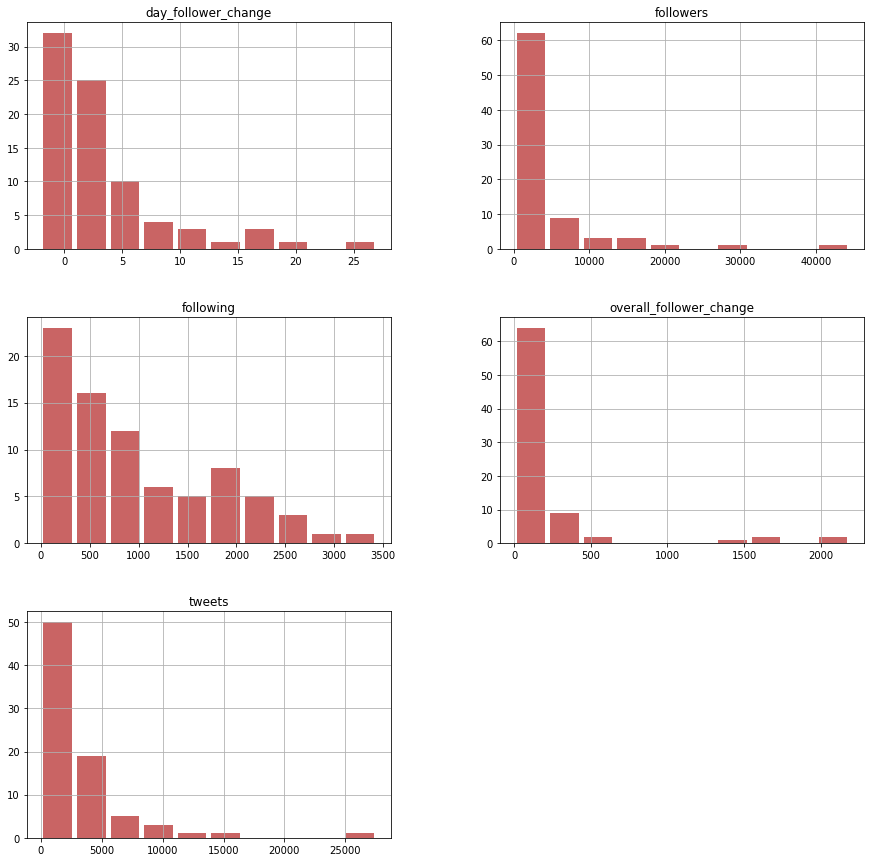

In [46]:
# Plot a histogram of the continuous features and save in a PDF file
# Color list can be found at: https://www.webucator.com/blog/2015/03/python-color-constants-module/
df[continuous_columns].hist(figsize=(15,15), color='#B22222',
                            alpha=0.7, rwidth=0.85)
plt.savefig('plt_continuous_histograms.pdf')

### Box plots for all the continuous features

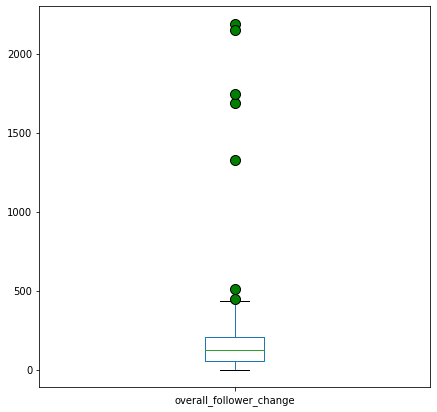

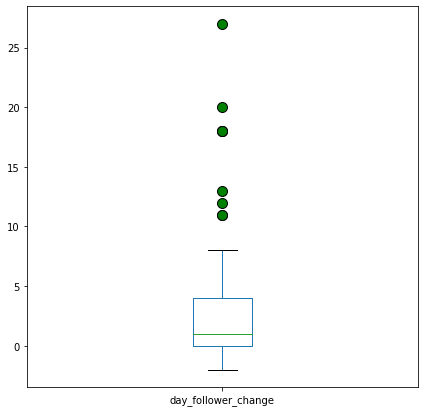

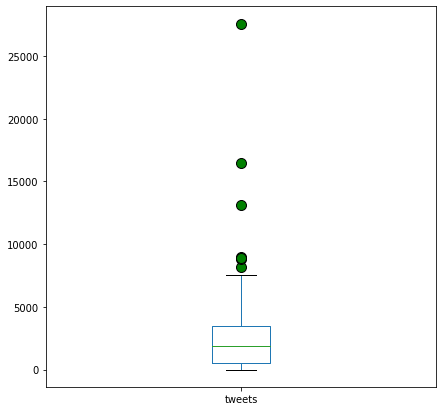

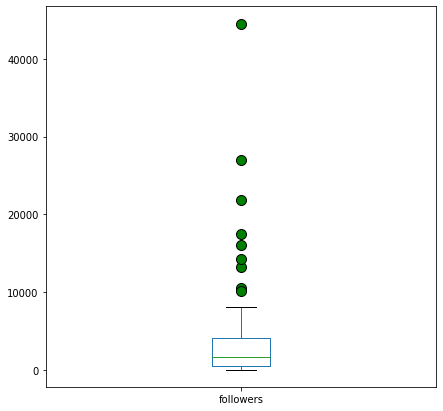

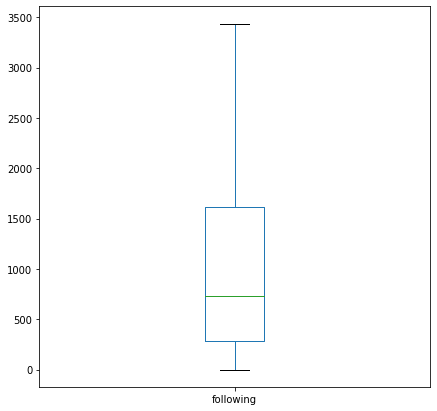

In [47]:
import seaborn as sns
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('plt_continuous_box_plots.pdf')
flierprops = dict(marker='o', markerfacecolor='green', markersize=10,linestyle='none')
for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(7,7),showfliers=True,flierprops=flierprops)
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Bar plots for all the categorical features

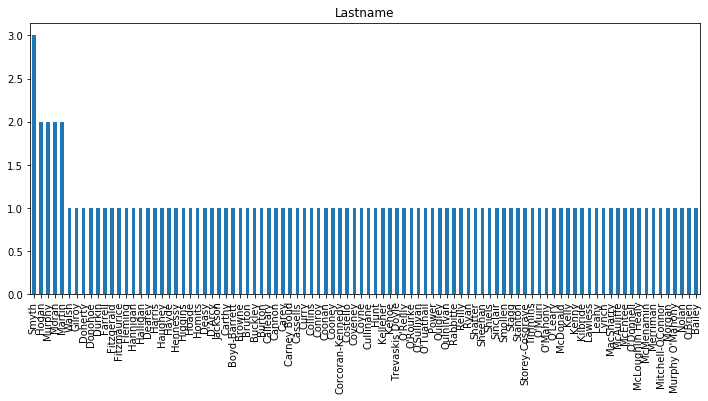

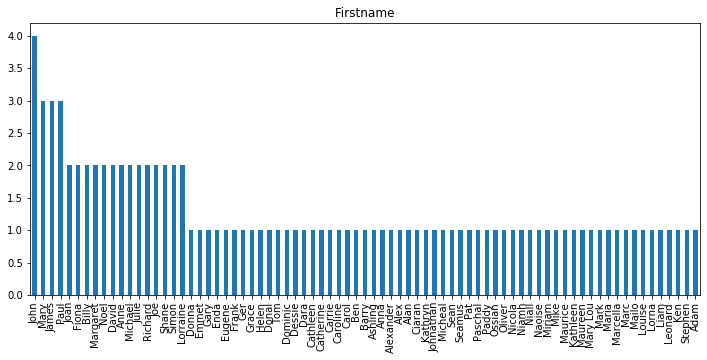

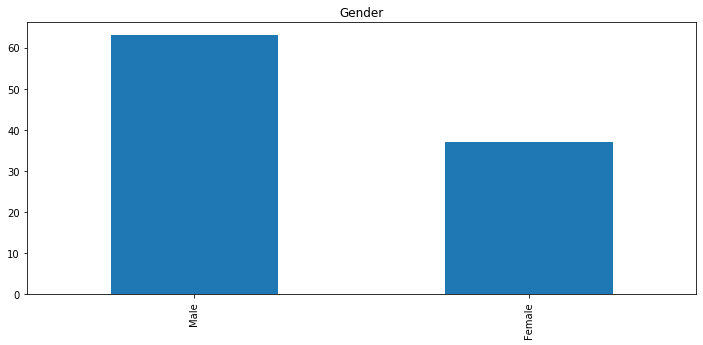

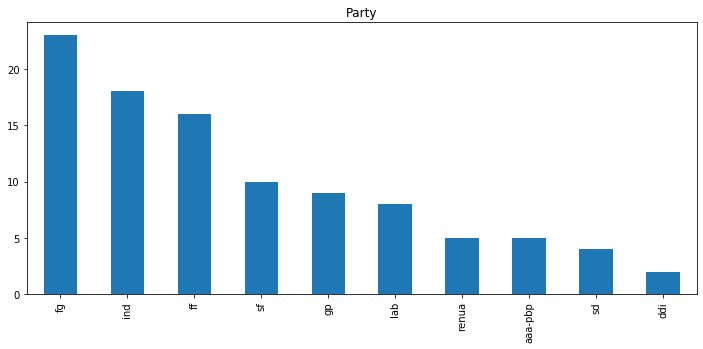

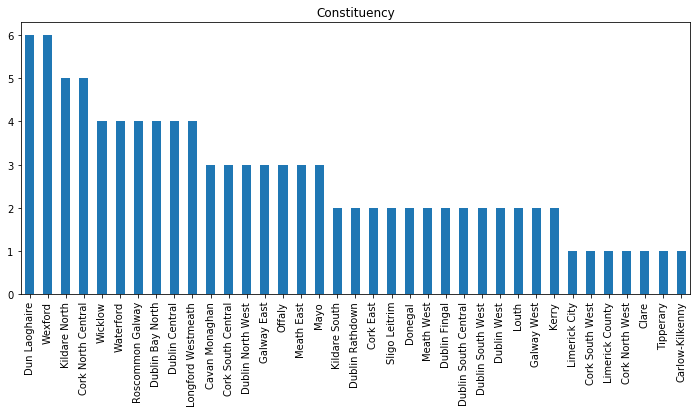

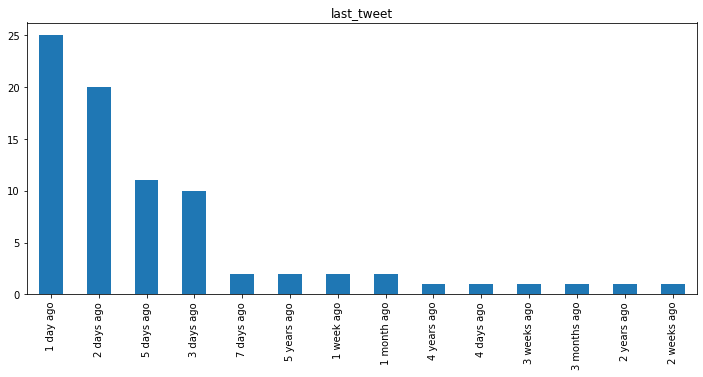

In [48]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('plt_categorical_bar_charts.pdf')

## NOTE: here we use the .copy to advoid the changing of "categorical_columns"
## if not, the "categorical_columns" will be changed.

printing_list_categorical_columns = categorical_columns.copy()
printing_list_categorical_columns.remove('Twitter ID')
printing_list_categorical_columns.remove('screen_name')
printing_list_categorical_columns.remove('Fullname')

for column in printing_list_categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Data Understanding: data quality plan

### Irregular cardinality

Categorical features can have irregular cardinality if the same value is entered several times with a different spelling for example. In the following cell, I check whether there are any values in the categorical features which are duplicated because 
of spelling mistakes or different input standards

In [49]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- Gender:", pd.unique(df.Gender.ravel()))
print("\n- Constituency:", sorted(pd.unique(df.Constituency.ravel())))
print("\n- Elected:", sorted(pd.unique(df.Elected.ravel())))
print("\n- OnTwitter:", sorted(pd.unique(df.OnTwitter.ravel())))
print("\n- Party:", sorted(pd.unique(df.Party.ravel())))
print("\n- last_tweet:", pd.unique(df.last_tweet.ravel()))

Unique values for:
- Gender: ['Male' 'Female']

- Constituency: ['Carlow-Kilkenny', 'Cavan Monaghan', 'Clare', 'Cork East', 'Cork North Central', 'Cork North West', 'Cork South Central', 'Cork South West', 'Donegal', 'Dublin Bay North', 'Dublin Central', 'Dublin Fingal', 'Dublin North West', 'Dublin Rathdown', 'Dublin South Central', 'Dublin South West', 'Dublin West', 'Dun Laoghaire', 'Galway East', 'Galway West', 'Kerry', 'Kildare North', 'Kildare South', 'Limerick City', 'Limerick County', 'Longford Westmeath', 'Louth', 'Mayo', 'Meath East', 'Meath West', 'Offaly', 'Roscommon Galway', 'Sligo Leitrim', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow']

- Elected: [0, 1]

- OnTwitter: [0, 1]

- Party: ['aaa-pbp', 'ddi', 'ff', 'fg', 'gp', 'ind', 'lab', 'renua', 'sd', 'sf']

- last_tweet: ['1 day ago' '2 days ago' nan '3 days ago' '1 month ago' '5 days ago'
 '3 months ago' '2 years ago' '4 days ago' '3 weeks ago' '1 week ago'
 '7 days ago' '2 weeks ago' '4 years ago' '5 years ago']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


There are no values in the categorical features that is duplicated. The cardinality of those features is correct.

### Null values

In the following cell, I check for null values in the dataset.

In [50]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

Twitter ID                  0
Lastname                    0
Firstname                   0
Fullname                    0
Gender                      0
Party                       0
Constituency                0
Elected                     0
OnTwitter                   0
overall_follower_change    20
day_follower_change        20
tweets                     20
last_tweet                 20
followers                  20
screen_name                20
following                  20
dtype: int64

here are null values in the dataset, they correspond to features regarding Twitter account information. 20 candidates do not have a Twitter account and therefore the values for these features are null for those candidates. There are no null values where a value would be expected.

### Outliers (It is hard! To decice remove or not remove those samples)
In the box plots produced above, there are a number of outliers for the followers, tweets, day_follower_change and overall_follower_change features.
They could be error in the data or represent correct information. So in the following cells, I check who are the 5 candidates with the most followers, the highest rate of follower change and who tweet the most.

In [51]:
# In the box plot above, we can see that there are a number of outliers in the 'followers' feature. This could be
# an error or it could be due to the fact that the outlier is a candidate who is more famous or influential than other candidates.

# Find out the 5 candidates with the highest number of followers
df.sort_values(by='followers', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,2189.0,20.0,431.0,5 days ago,44534.0,endakennytd,560.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,2146.0,18.0,5227.0,3 days ago,26976.0,maryloumcdonald,944.0
33,118999126.0,Coveney,Simon,Simon Coveney,Male,fg,Cork South Central,1,1,510.0,7.0,3631.0,3 days ago,21845.0,simoncoveney,600.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,1690.0,18.0,947.0,5 days ago,17439.0,michealmartintd,1851.0
48,77184360.0,Burton,Joan,Joan Burton,Female,lab,Dublin West,1,1,1325.0,11.0,947.0,5 days ago,15980.0,joanburton,572.0


The candidate who has the most followers is Enda Kenny and the top five candidates are very influential. It is expected that they would have more followers than other candidates, therefore the outliers for this features seem to have correct values. 
==> Not delete

In [52]:
# Find the 5 candidates with the highest rate of overall follower change
df.sort_values(by='overall_follower_change', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,2189.0,20.0,431.0,5 days ago,44534.0,endakennytd,560.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,2146.0,18.0,5227.0,3 days ago,26976.0,maryloumcdonald,944.0
82,236377912.0,Boyd-Barrett,Richard,Richard Boyd Barrett,Male,aaa-pbp,Dun Laoghaire,1,1,1742.0,18.0,3097.0,1 day ago,14290.0,rboydbarrett,1822.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,1690.0,18.0,947.0,5 days ago,17439.0,michealmartintd,1851.0
48,77184360.0,Burton,Joan,Joan Burton,Female,lab,Dublin West,1,1,1325.0,11.0,947.0,5 days ago,15980.0,joanburton,572.0


In [53]:
# Find the 5 candidates with the highest rate of day follower change
df.sort_values(by='day_follower_change', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
17,190987689.0,Murphy,Catherine,Catherine Murphy,Female,sd,Kildare North,1,1,0.0,27.0,6485.0,2 days ago,13245.0,cathmurphytd,1421.0
39,135514272.0,Kenny,Enda,Enda Kenny,Male,fg,Mayo,1,1,2189.0,20.0,431.0,5 days ago,44534.0,endakennytd,560.0
82,236377912.0,Boyd-Barrett,Richard,Richard Boyd Barrett,Male,aaa-pbp,Dun Laoghaire,1,1,1742.0,18.0,3097.0,1 day ago,14290.0,rboydbarrett,1822.0
24,114007914.0,Martin,Micheal,Micheal Martin,Male,ff,Cork South Central,1,1,1690.0,18.0,947.0,5 days ago,17439.0,michealmartintd,1851.0
88,148872468.0,McDonald,Mary Lou,Mary Lou McDonald,Female,sf,Dublin Central,1,1,2146.0,18.0,5227.0,3 days ago,26976.0,maryloumcdonald,944.0


The candidates who have the highest rate of overall follower change have a high number of followers (4 of them are in the top 5). They also correspond to candidates with a high daily follower change rate. The data therefore does not seem erroneous. ==> Not delete

In [54]:
# Find the 5 candidates with the most tweets
df.sort_values(by='tweets', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
55,180885830.0,Hunt,Carol,Carol Hunt,Female,ind,Dun Laoghaire,0,1,299.0,1.0,27592.0,1 day ago,8113.0,carolmhunt,2680.0
15,18492194.0,Lawless,James,James Lawless,Male,ff,Kildare North,1,1,129.0,3.0,16452.0,1 day ago,2478.0,lawlessj,2208.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,0.0,13132.0,1 day ago,6061.0,ciarancannon,2609.0
66,92521829.0,Mitchell-OConnor,Mary,Mary Mitchell O'Connor,Female,fg,Dun Laoghaire,1,1,157.0,4.0,8989.0,1 day ago,5707.0,mitchelloconnor,2752.0
78,39019643.0,Higgins,Lorraine,Lorraine Higgins,Female,lab,Galway East,0,1,171.0,4.0,8919.0,2 days ago,4497.0,lorhiggins,1332.0


The 5 candidates with the most tweets tweeted in the last couple of days. It is possible that they have a habit of twitting often. It is not possible to understand whether the data is correct or not. ==> Not delete

### Duplicate rows

In the following cell, I check for duplicate rows. It is important to eliminate duplicates so as not to skew the result of the analysis, so if one candidate appears in more than one row, it would be necessary to eliminate one of the rows.

In [55]:
def getdup(df,idx):
    ids = df[idx]
    return df[ids.isin(ids[ids.duplicated()])]

In [56]:
print(len(getdup(df,'Twitter ID')))
print(len(getdup(df,'Fullname')))
print(len(getdup(df,'screen_name')))

20
0
20


In [57]:
print(df[['Twitter ID','Fullname','screen_name']].head(5))
print('-'*50)
print('Number of duplicated rows:' + str(sum(df[['Twitter ID','Fullname','screen_name']].duplicated())))

    Twitter ID          Fullname   screen_name
0  507910843.0      Sean Haughey  sean_haughey
1  238613047.0     Julie O'Leary     julieolry
2   20586381.0     Ciaran Cannon  ciarancannon
3  219454029.0  Jonathan O'Brien    jobrien_sf
4   19735329.0   Paschal Donohoe      paschald
--------------------------------------------------
Number of duplicated rows:0


There are no rows containing the same values for twitter ID, Fullname or screen_name, except for null values in Twitter ID and screen_name, suggesting that there are no duplicated candidates.

## Solutions

### Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| day_follower_change     | Missing Values (20%) | Complete-case analysis       |
| followers               | Missing Values (20%) | Complete-case analysis       | 
| following               | Missing Values (20%) | Complete-case analysis       |
| last_tweet              | Missing Values (20%) | Complete-case analysis       |
| overall_follower_change | Missing Values (20%) | Complete-case analysis       |
| screen_name             | Missing Values (20%) | Complete-case analysis       |
| tweets                  | Missing Values (20%) | Complete-case analysis       |
| followers               | Outliers             | Do nothing                   |
| day_follower_change     | Outliers             | Do nothing                   |
| overall_follower_change | Outliers             | Do nothing                   |
| tweets                  | Outliers             | Do nothing                   |

I am **removing all rows containing null values, because they correspond to candidates who do not have a Twitter account.** The tasl for this problem is to 'look for initial evidence that candidate Twitter account details (e.g., tweets, folowers) is (or not) indicative of getting elected'. Therefore data relating to candidates who do not have a Twitter account is not relevant and would skew the result of the analysis. Dropping the features containing null values would affect the analysis because they correspond to the Twitter account details of the candidates. Imputation (replacing missing values with a measure of central tendency) would not be useful either because it would distort the data by putting too much weight on the mean, median or mode depending on which measure was chosen as a replacement.

There are outliers in the followers, day_follower_change, overall_follower_change and tweets features. I have decided **not to remove the outliers** by clamping, because as shown above, the outliers for  followers, day_follower_change and overall_follower_change seem to be valid. Removing this data would probably modify the dataset to not reflect reality. It is not possible to verify the validity of the outliers in the tweets feature so I chose to be cautious and to accept them as being valid, and therefore to keep them in the dataset so as not to produce distorted data. 


In [58]:
# Remove all rows for candidates who are not on Twitter - therefore all rows with null values
clean_df = df[df.OnTwitter == 1]
clean_df.head()

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,OnTwitter,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,1,206.0,11.0,2160.0,1 day ago,1589.0,sean_haughey,437.0
1,238613047.0,O'Leary,Julie,Julie O'Leary,Female,fg,Cork North Central,0,1,132.0,-2.0,3246.0,1 day ago,799.0,julieolry,888.0
2,20586381.0,Cannon,Ciaran,Ciaran Cannon,Male,fg,Galway East,1,1,104.0,0.0,13132.0,1 day ago,6061.0,ciarancannon,2609.0
3,219454029.0,O'Brien,Johnathan,Jonathan O'Brien,Male,sf,Cork North Central,1,1,434.0,12.0,3305.0,2 days ago,3943.0,jobrien_sf,1000.0
4,19735329.0,Donohoe,Paschal,Paschal Donohoe,Male,fg,Dublin Central,1,1,310.0,5.0,7567.0,1 day ago,10484.0,paschald,1817.0


In [59]:
# Check that there are no null values in the dataframe
print(clean_df.isnull().sum())

# check that only 20 rows have been removed (check that there are now 80 rows)
print("\nNumber of rows:", clean_df.shape[0])

Twitter ID                 0
Lastname                   0
Firstname                  0
Fullname                   0
Gender                     0
Party                      0
Constituency               0
Elected                    0
OnTwitter                  0
overall_follower_change    0
day_follower_change        0
tweets                     0
last_tweet                 0
followers                  0
screen_name                0
following                  0
dtype: int64

Number of rows: 80


Now that rows for candidates who are not on Twitter have been removed, the feature OnTwitter should have a cardinality of 1. If this is the case, it can be removed as it is not useful.

In [60]:
# print unique values in OnTwitter column
print("\n- Unique values for OnTwitter:", pd.unique(clean_df.OnTwitter.ravel()))

# Remove OnTwitter column if there are only one unique value in OnTwitter
if(len(pd.unique(clean_df.OnTwitter.ravel())) == 1):
    clean_df = clean_df.drop('OnTwitter', 1)


- Unique values for OnTwitter: [1]


## Save the Clean data

In [61]:
# Save cleaned dataframe to new CSV file
clean_df.to_csv('data_ge16-candidates-twitter-elected-clean.csv', index=False)

clean_df.head(1)

,Twitter ID,Lastname,Firstname,Fullname,Gender,Party,Constituency,Elected,overall_follower_change,day_follower_change,tweets,last_tweet,followers,screen_name,following
0,507910843.0,Haughey,Sean,Sean Haughey,Male,ff,Dublin Bay North,1,206.0,11.0,2160.0,1 day ago,1589.0,sean_haughey,437.0


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data-into-Dataframe" data-toc-modified-id="Load-data-into-Dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data into Dataframe</a></span></li><li><span><a href="#Search-Information-in-Raw-Text" data-toc-modified-id="Search-Information-in-Raw-Text-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Search Information in Raw Text</a></span><ul class="toc-item"><li><span><a href="#Index-of-Word" data-toc-modified-id="Index-of-Word-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Index of Word</a></span></li><li><span><a href="#Word-Concordance" data-toc-modified-id="Word-Concordance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Word Concordance</a></span></li><li><span><a href="#Counting" data-toc-modified-id="Counting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Counting</a></span></li><li><span><a href="#Findall-using-Regular-Expression" data-toc-modified-id="Findall-using-Regular-Expression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Findall using Regular Expression</a></span><ul class="toc-item"><li><span><a href="#Harry's-best-friend" data-toc-modified-id="Harry's-best-friend-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Harry's best friend</a></span></li><li><span><a href="#Number-of-Professors-in-Harry-Potter-1" data-toc-modified-id="Number-of-Professors-in-Harry-Potter-1-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Number of Professors in Harry Potter 1</a></span></li></ul></li></ul></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Decapitalization-(if-necessary)" data-toc-modified-id="Decapitalization-(if-necessary)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decapitalization (if necessary)</a></span></li><li><span><a href="#Remove" data-toc-modified-id="Remove-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove</a></span><ul class="toc-item"><li><span><a href="#Remove-Stop-Words" data-toc-modified-id="Remove-Stop-Words-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Remove Stop Words</a></span></li><li><span><a href="#Handle-the-CAPITALIZED-Word" data-toc-modified-id="Handle-the-CAPITALIZED-Word-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Handle the CAPITALIZED Word</a></span></li><li><span><a href="#Remove-Salutation" data-toc-modified-id="Remove-Salutation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Remove Salutation</a></span></li><li><span><a href="#Remove-Numbers" data-toc-modified-id="Remove-Numbers-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Remove Numbers</a></span></li></ul></li><li><span><a href="#Stemming-and-Lemmatization" data-toc-modified-id="Stemming-and-Lemmatization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stemming and Lemmatization</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Stemming" data-toc-modified-id="Stemming-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Stemming</a></span></li><li><span><a href="#Lemmatization" data-toc-modified-id="Lemmatization-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Lemmatization</a></span></li></ul></li></ul></li><li><span><a href="#Apply-those-techniques-to-the-Series" data-toc-modified-id="Apply-those-techniques-to-the-Series-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Apply those techniques to the Series</a></span></li><li><span><a href="#Plot-the-Wordcloud" data-toc-modified-id="Plot-the-Wordcloud-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Wordcloud</a></span></li><li><span><a href="#Top-10-Most-Common-Words" data-toc-modified-id="Top-10-Most-Common-Words-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Top-10 Most Common Words</a></span></li><li><span><a href="#Get-Noun-Only-+-Plot-10-Top-Most-Common-Nouns" data-toc-modified-id="Get-Noun-Only-+-Plot-10-Top-Most-Common-Nouns-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Get Noun Only + Plot 10-Top Most Common Nouns</a></span></li><li><span><a href="#Extra-Tasks:" data-toc-modified-id="Extra-Tasks:-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Extra Tasks:</a></span><ul class="toc-item"><li><span><a href="#Get-Proper-Nouns" data-toc-modified-id="Get-Proper-Nouns-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Get Proper Nouns</a></span></li><li><span><a href="#Check-the-dispersion_plot" data-toc-modified-id="Check-the-dispersion_plot-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Check the dispersion_plot</a></span><ul class="toc-item"><li><span><a href="#For-Harry-Potter-1" data-toc-modified-id="For-Harry-Potter-1-11.2.1"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>For Harry Potter 1</a></span></li><li><span><a href="#For-All-Books" data-toc-modified-id="For-All-Books-11.2.2"><span class="toc-item-num">11.2.2&nbsp;&nbsp;</span>For All Books</a></span></li></ul></li></ul></li></ul></div>

In [62]:
import numpy as np
import nltk, io, os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Load data into Dataframe

In [63]:
datapath = './Data/harry.potter'

In [64]:
df_raw = pd.DataFrame([],columns=['Book','Name','Content'])

for root, directories, files in os.walk(datapath):
    for filename in files:
        _name = os.path.splitext(filename)[0]
        _book, _name = _name.split(' - ')
        
        filepath = os.path.join(root, filename)
        
        f = open(filepath,"r",encoding='latin') 
        _content = f.read()

        pieces = {'Book': _book, 'Name': _name, 'Content':_content}
        df_raw = df_raw.append(pieces,ignore_index=True)
df_raw

,Book,Name,Content
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...


In [65]:
df_raw = df_raw.sort_values(by='Book', ascending=True, na_position='first')
df_raw = df_raw.reset_index(drop=True)
df_raw

,Book,Name,Content
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...


In [66]:
## Save data into CSV RAW file
df_raw.to_csv('HarryData_raw.csv',sep=',',index=None)
del df_raw

In [67]:
## Check the saved data by re-load again
df_raw = pd.read_csv('HarryData_raw.csv',sep=',')
df_raw

,Book,Name,Content
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...


## Search Information in Raw Text

- Make the sample_content by using HP1 text

In [68]:
sample_raw_text = df_raw.iloc[0]['Content']

### Index of Word

In [69]:
## Return the first index of word "Ron"
sample_raw_text.index("Ron")

132602

In [70]:
## We can return all index of "Ron" by using regular expression library
import re
list_ron = [m.start() for m in re.finditer('Ron', sample_raw_text)]
print(list_ron[0:10])  ## Print 10 first indices of "Ron"

[132602, 133158, 136217, 136421, 136497, 137705, 137733, 137780, 139973, 140124]


### Word Concordance
 - A concordance view shows us every occurrence of a given word, together with some context.
 - Word matching is not case-sensitive.

In [71]:
_tokens = nltk.word_tokenize(sample_raw_text)
text = nltk.Text(_tokens)

In [72]:
text.concordance("Ron",True)

Displaying 25 of 429 matches:
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 
 Ron 


### Counting

In [73]:
text.count('Ron') + text.count('ron')  

429

In [74]:
## Another way: using regular expression
len(re.findall(r' [Rr]on ',' '.join(text)))

429

In [75]:
## However, we can't get the same result here. Why?
len(re.findall(r'[Rr]on',' '.join(text)))

577

Because the finding contains many different cases. 

E.g.: "f[ron]t", "st[ron]g", "w[ron]g", "[Ron]nie", "[Ron]an" etc.

### Findall using Regular Expression

#### Harry's best friend

In [76]:
text.findall(r'<Harry> <.*> <Ron>')

Harry and Ron; Harry asked Ron; Harry and Ron; Harry and Ron; Harry
and Ron; Harry and Ron; Harry asked Ron; Harry borrowed Ron; Harry and
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry remembered
Ron; Harry and Ron; Harry and Ron; Harry , Ron; Harry and Ron; Harry
and Ron; Harry and Ron; Harry filled Ron; Harry and Ron; Harry and
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry
, Ron; Harry , Ron; Harry and Ron; Harry , Ron; Harry . Ron; Harry and
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry
and Ron; Harry and Ron; Harry , Ron; Harry and Ron; Harry and Ron;
Harry and Ron; Harry knew Ron; Harry and Ron; Harry , Ron; Harry ,
Ron; Harry and Ron; Harry and Ron; Harry told Ron; Harry and Ron;
Harry and Ron; Harry and Ron; Harry , Ron; Harry , Ron; Harry , Ron


In [77]:
text.findall(r'<Harry> <\w+> <Ron>')

Harry and Ron; Harry asked Ron; Harry and Ron; Harry and Ron; Harry
and Ron; Harry and Ron; Harry asked Ron; Harry borrowed Ron; Harry and
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry remembered
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry
and Ron; Harry filled Ron; Harry and Ron; Harry and Ron; Harry and
Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry
and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron;
Harry and Ron; Harry and Ron; Harry and Ron; Harry and Ron; Harry and
Ron; Harry knew Ron; Harry and Ron; Harry and Ron; Harry and Ron;
Harry told Ron; Harry and Ron; Harry and Ron; Harry and Ron


In [78]:
no_ron = len(re.findall(r'Harry and Ron',sample_raw_text))
no_hermione = len(re.findall(r'Harry and Hermione',sample_raw_text))
print('The occurrences of [Harry] and [Ron] together: ' + str(no_ron))
print('The occurrences of [Harry] and [Hermione] together: ' + str(no_hermione))
print(" ===> Ron is Harry's best friend!")

The occurrences of [Harry] and [Ron] together: 37
The occurrences of [Harry] and [Hermione] together: 14
 ===> Ron is Harry's best friend!


#### Number of Professors in Harry Potter 1

In [79]:
no_prof = len(set(re.findall(r'[Pp]*rofessor [A-Z]\w+',sample_raw_text)))
print('Number of Professor in Harry Potter 1 is: '+ str(no_prof))
print('The name of Professors are: ' + str(set(re.findall(r'[Pp]*rofessor [A-Z]\w+',sample_raw_text))))

Number of Professor in Harry Potter 1 is: 9
The name of Professors are: {'Professor Dumbledore', 'Professor Sprout', 'Professor McGonagall', 'Professor Quirrell', 'Professor Quirtell', 'Professor Snape', 'Professor Flitwick', 'Professor Binns', 'Professor Vindictus'}


## Tokenization
Split the Raw Text into Tokens by using Regular Expression Filter

In [80]:
# Tokenization
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)
token_words = tokenizer.tokenize(sample_raw_text)
print('Tokens:' + str(token_words[0:10]))

Tokens:['Harry', 'Potter', 'and', 'the', 'Sorcerer', 's', 'Stone', 'CHAPTER', 'ONE', 'THE']


## Decapitalization (if necessary)
This step will decapitalize all words in Tokens list. It will help the checking 

In [81]:
# # Decapitalization
# token_words = [word.lower() for word in token_words]
# print('Decapitalized Tokens:' + str(token_words[0:10]))

## Remove

 ### Remove Stop Words

In [82]:
# Remove stop words
from nltk.corpus import stopwords
stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

rmsw_token_words = ([word for word in token_words if word.lower() not in stoplist_combined])
print('Stopwords removed:' + str(rmsw_token_words[0:20]))

Stopwords removed:['Harry', 'Potter', 'Sorcerer', 'Stone', 'CHAPTER', 'BOY', 'LIVED', 'Mr', 'Mrs', 'Dursley', 'number', 'Privet', 'Drive', 'proud', 'perfectly', 'normal', 'people', 'expect', 'involved', 'strange']


### Handle the CAPITALIZED Word

In [83]:
rmcap_token_words =[]
for word in rmsw_token_words:
    if word.isupper():
        rmcap_token_words.append(word.title())
    else:
        rmcap_token_words.append(word)
print('CAPITALIZED removed: ' + str(rmcap_token_words[0:20]))

CAPITALIZED removed: ['Harry', 'Potter', 'Sorcerer', 'Stone', 'Chapter', 'Boy', 'Lived', 'Mr', 'Mrs', 'Dursley', 'number', 'Privet', 'Drive', 'proud', 'perfectly', 'normal', 'people', 'expect', 'involved', 'strange']


### Remove Salutation

In [84]:
 ## Remove salutation
salutation = ['mr','mrs','mss','dr','phd','prof','rev']
rmsalu_token_words = ([word for word in rmcap_token_words if word.lower() not in salutation])
print('Salutation removed: ' + str(rmsalu_token_words[0:20]))

Salutation removed: ['Harry', 'Potter', 'Sorcerer', 'Stone', 'Chapter', 'Boy', 'Lived', 'Dursley', 'number', 'Privet', 'Drive', 'proud', 'perfectly', 'normal', 'people', 'expect', 'involved', 'strange', 'mysterious', 'hold']


### Remove Numbers

In [85]:
 ## Remove Numbers
rmnb_token_words = ([word for word in rmsalu_token_words if not word.isdigit()])
print('Number removed: ' + str(rmnb_token_words[0:20]))

Number removed: ['Harry', 'Potter', 'Sorcerer', 'Stone', 'Chapter', 'Boy', 'Lived', 'Dursley', 'number', 'Privet', 'Drive', 'proud', 'perfectly', 'normal', 'people', 'expect', 'involved', 'strange', 'mysterious', 'hold']


## Stemming and Lemmatization

#### Stemming

In [86]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in rmnb_token_words]
print('Stems:' + str(stemmed_words[0:10]))

Stems:['harri', 'potter', 'sorcer', 'stone', 'chapter', 'boy', 'live', 'dursley', 'number', 'privet']


#### Lemmatization

In [87]:
## Function to transfer the tags of POS
def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'n'

Using the information of Part-Of-Speech, we can lemmatize each token as follows:

In [88]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lemma_words = []
for word, tag in nltk.pos_tag(rmnb_token_words):
    firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
    wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
    if not wtag:
        lemma_words.extend([word])
    else:
        lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag

print('Lemmas : ' + str(lemma_words[0:10]))

Lemmas : ['Harry', 'Potter', 'Sorcerer', 'Stone', 'Chapter', 'Boy', 'Lived', 'Dursley', 'number', 'Privet']


Can you see the differences between 'lemma_words' and 'stemmed_words'?

## Apply those techniques to the Series

In [89]:
def convert_tokens(rawtext, verbose):
    # First: Tokenization
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(rawtext)
    if (verbose):
        print('Tokens:' + str(token_words[0:10]))
    
    # # Second: Decapitalization (if needed)
    # decap_token_words = [word.lower() for word in token_words]
    # print('Decapitalized Tokens:' + str(decap_token_words[0:10]))
    
    # Third: Remove stop words
    from nltk.corpus import stopwords
    stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en = set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    # Combine the stopwords. Its a lot longer so I'm not printing it out...
    stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

    rmsw_token_words = ([word for word in token_words if word.lower() not in stoplist_combined])
    if (verbose):
        print('Stopwords removed:' + str(rmsw_token_words[0:20]))
    
    ## Fouth: remove CAP words
    rmcap_token_words =[]
    for word in rmsw_token_words:
        if word.isupper():
            rmcap_token_words.append(word.title())
        else:
            rmcap_token_words.append(word)
    if (verbose):
        print('CAPITALIZED removed:' + str(rmcap_token_words[0:20]))
        
     ## Fifth : Remove salutation
    salutation = ['mr','mrs','mss','dr','phd','prof','rev', 'professor']
    rmsalu_token_words = ([word for word in rmcap_token_words if word.lower() not in salutation])
    if (verbose):
        print('Salutation removed:' + str(rmsalu_token_words[0:20]))
        
     ## Sixth: Remove Numbers
    rmnb_token_words = ([word for word in rmsalu_token_words if not word.isdigit()])
    if (verbose):
        print('Number removed: ' + str(rmnb_token_words[0:20]))
        
    ## define transfer tag function:
    def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'n'
    
    ## Seventh: Lemmatization
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()

    lemma_words = []
    for word, tag in nltk.pos_tag(rmnb_token_words):
        firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
        wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
        if not wtag:
            lemma_words.extend([word])
        else:
            lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag
    if (verbose):
        print('Lemmas : ' + str(lemma_words[0:10]))
        
    
    ## RETURN
    return lemma_words

In [90]:
df_handle = df_raw.copy()
[n,d] = df_handle.shape
df_handle['Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['Tokens'].iloc[index] = convert_tokens(row['Content'],0)
    
df_handle.head(10)

,Book,Name,Content,Tokens
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...,"[Harry, Potter, Sorcerer, Stone, Chapter, Boy,..."
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...,"[Harry, Potter, Chamber, Secrets, Worst, Birth..."
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...,"[Chapter, Owl, Post, Harry, Potter, highly, un..."
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...,"[Chapter, Riddle, House, villager, Hangleron, ..."
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...,"[Chapter, Dudley, Demented, hot, day, summer, ..."
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...,"[Chapter, Minister, near, midnight, Prime, Min..."
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...,"[Chapter, Dark, Lord, Ascending, men, appear, ..."


## Plot the Wordcloud

In [91]:
## Wordcloud function
def wordcloudplot(tokens):
    # visualization by wordcloud
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    text2 = ' '.join(tokens)

    wordcloud = WordCloud(width=1600, height=800).generate(text2)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

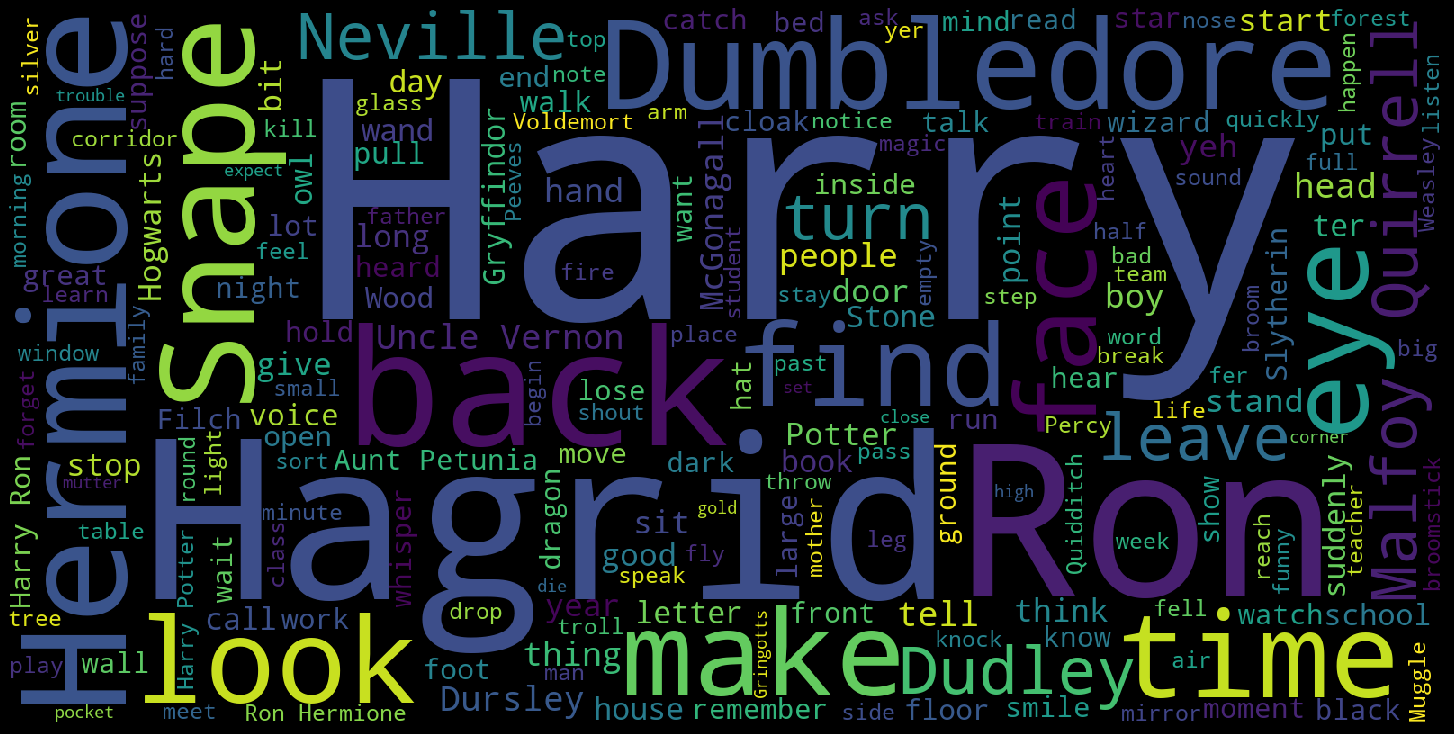

In [92]:
## Plot the wordcloud for HP1 Tokens
wordcloudplot(df_handle.iloc[0]['Tokens'])

## Top-10 Most Common Words


Most frequent top-10 words:  [('Harry', 1327), ('Ron', 429), ('Hagrid', 370), ('Hermione', 270), ('back', 264), ('Snape', 172), ('look', 164), ('Dumbledore', 159), ('Dudley', 139), ('time', 136)]


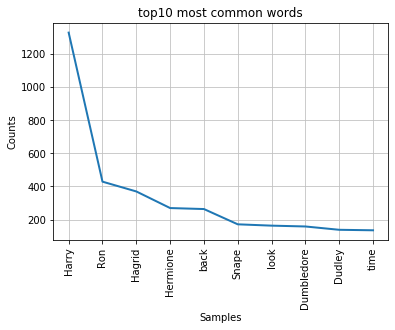

In [93]:
## Find and plot 10-most common words for Harry Potter 1
tokens = df_handle.iloc[0]['Tokens']
word_frequency = nltk.FreqDist(tokens)
#What are the top-10 most frequent words
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10, title='top10 most common words')

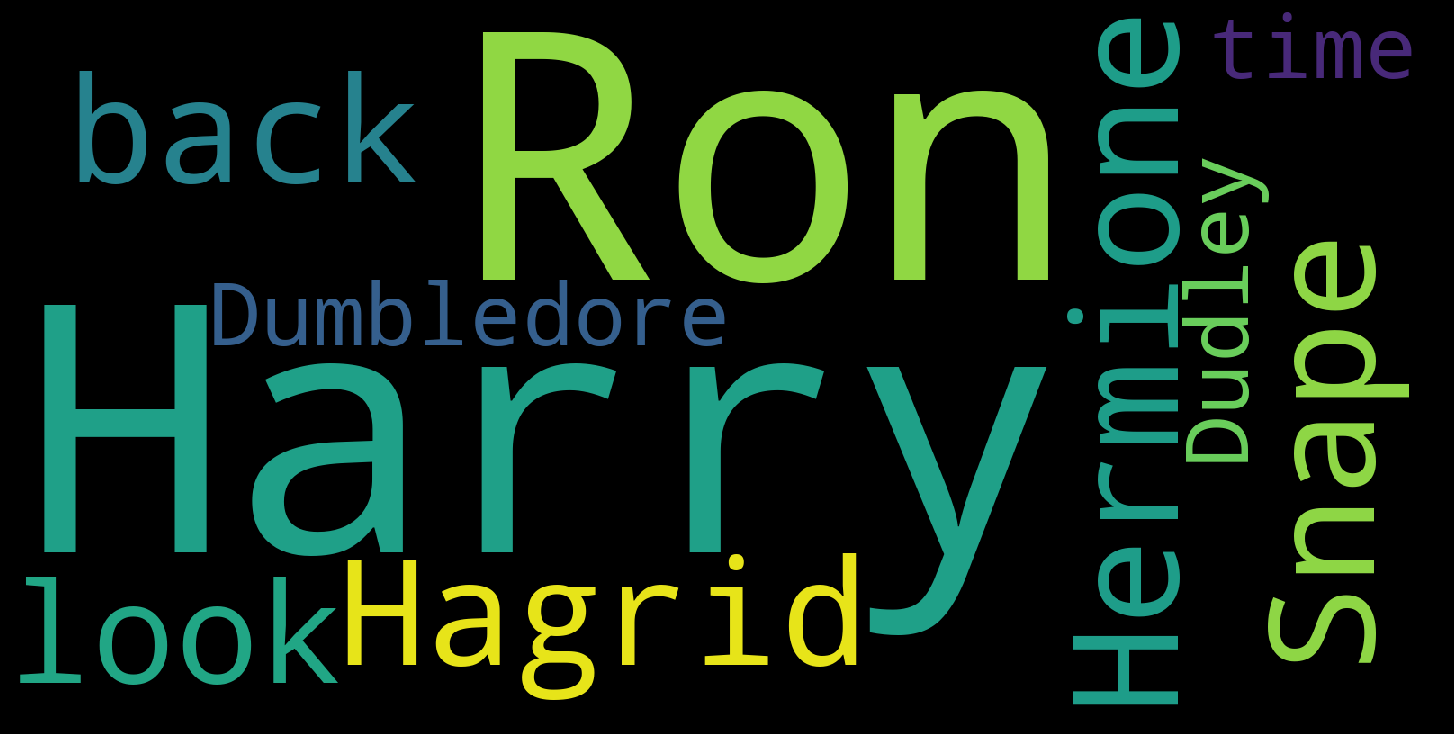

In [94]:
## Plot the wordcloud of 10-most common words
word_frequency =  nltk.FreqDist(tokens)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(10)]
wordcloudplot(topw)

## Get Noun Only + Plot 10-Top Most Common Nouns

In [95]:
# get noun for Harry Potter 1
tokens = df_handle.iloc[0]['Tokens']
is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 

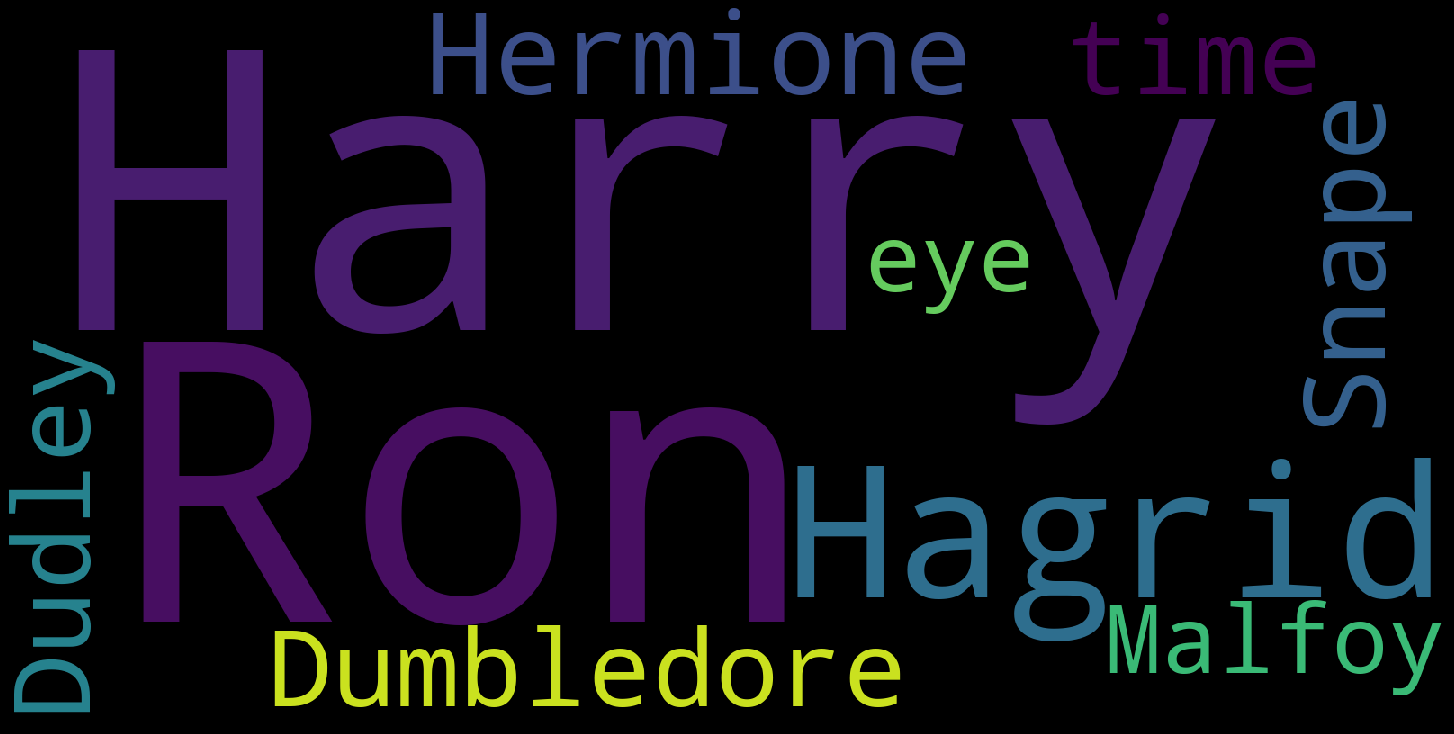

In [96]:
## Plot top-10 nouns
word_frequency =  nltk.FreqDist(nouns)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(10)]
wordcloudplot(topw)

## Extra Tasks:

### Get Proper Nouns

In [97]:
import nltk
from nameparser.parser import HumanName
from nltk.corpus import wordnet

def extract_name(text):
    listname = []
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if(chunk.label() == 'PERSON'):
                    listname.append(' '.join(c[0] for c in chunk.leaves()))
                    
    return listname

In [98]:
## Get Names from HP books
text = ' '.join(df_handle.iloc[0]['Tokens'])
listname = extract_name(text)
listname = set(list(listname))
listname

## Filter 
words = set(nltk.corpus.words.words('en'))

# def isname(string):
#     return any([w not in words for w in string.lower().split()])

def isname(string):
    return all([w not in words for w in string.lower().split()])

person_names =[]
for x in listname:
    if (isname(x) == True):
        person_names.append(x)
        
## Remove salutaion words
salutation = ['mr.','mrs.','mss.','dr.','phd.','prof.','rev.', 'professor', 'sir', 'madam']
person_names = ([word for word in person_names if word.lower() not in salutation])

## Remove emotion words
emotion_words = ['oooooooh','aargh','urgh','shhh','hmm','yeh','nah','dunno']
person_names = ([word for word in person_names if word.lower() not in emotion_words])

## Re-check name in content
raw_content = df_handle.iloc[0]['Content']
person_names = set([word for word in person_names if len(re.findall(word,raw_content))>=1])


In [99]:
print(person_names)

{'Ravenclaw', 'Bludger', 'Petrificus Totalus', 'Scared', 'Percy Weasley', 'Norbert', 'Mars', 'Quaffle', 'Adrian Pucey', 'Copyin', 'Perenelle', 'Vernon', 'Hang', 'Knuts', 'Binns', 'Dursley', 'Slytherins', 'Ronald Weasley', 'Hannah', 'Mars Bars', 'Wingardium Leviosa', 'Alicia Spinnet', 'Malfoys', 'Hermione', 'Potions', 'Barrels', 'Quirrell', 'Paddington', 'Ronniekins', 'Flocks', 'Ronnie', 'Hagrid', 'Cups', 'Trevor', 'Gryffindor', 'Romania', 'Jim McGuffin', 'Longbottom', 'Sirius', 'Griphook', 'Flitwick', 'Firenze', 'Ron', 'George Weasley', 'Makes', 'Hedwig', 'Piers Polkiss', 'Ronan', 'Quidditch', 'Weasleys', 'Broomsticks', 'Spells', 'Cliodna', 'Scabbets', 'Percy', 'Chasers', 'Yvonne', 'Dursleys', 'Blackpool', 'Gringotts', 'Columns', 'Mom', 'Ickle Dudleykins', 'Wands', 'Peeves', 'Dedalus Diggle', 'Seamus', 'Sickles', 'Seamus Finnigan', 'Mighta', 'Devon', 'Herbology', 'Nicolas Flamel', 'Hogwarts', 'Flitwicles', 'Christmas', 'Minerva', 'Grunnings', 'Charlie', 'Fred Weasley', 'Neville', 'Mugg

### Check the dispersion_plot

#### For Harry Potter 1

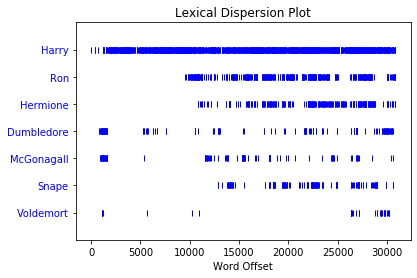

In [100]:
from nltk.draw.dispersion import dispersion_plot

Tokens = df_handle.iloc[0]['Tokens']
Content = df_handle.iloc[0]['Content']

word_frequency =  nltk.FreqDist(Tokens)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(5)]

plan = [w for w in Tokens]   
issue = ['Harry','Ron','Hermione','Dumbledore','McGonagall','Snape','Voldemort']
dispersion_plot(plan, issue, title='Lexical Dispersion Plot')

#### For All Books

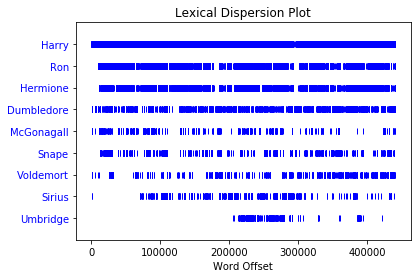

In [101]:
from nltk.draw.dispersion import dispersion_plot

list_Tokens =  list(([item for items in df_handle.Tokens.tolist() for item in items]))
list_Content =  list(([item for items in df_handle.Content.tolist() for item in items]))


word_frequency =  nltk.FreqDist(list_Tokens)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(5)]

plan = [w for w in list_Tokens]   
issue = ['Harry','Ron','Hermione','Dumbledore','McGonagall','Snape','Voldemort','Sirius','Umbridge']
dispersion_plot(plan, issue, title='Lexical Dispersion Plot')

From here, we can see that Voldermort is named more often in last books. So, the people are no longer frightened by his name. 

Finally, you can get several interesting analysis on HP series by : https://medium.com/zareen-farooqui/harry-potter-text-analysis-4d89ffe59d5b

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LOAD-DATA-(Harry-Potter-Series)" data-toc-modified-id="LOAD-DATA-(Harry-Potter-Series)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LOAD DATA (Harry Potter Series)</a></span><ul class="toc-item"><li><span><a href="#Transfer-the-contractions-samples-(e.g.-n't---&gt;-not)" data-toc-modified-id="Transfer-the-contractions-samples-(e.g.-n't--->-not)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Transfer the contractions samples (e.g. n't --&gt; not)</a></span></li></ul></li><li><span><a href="#Convert-data-from-RAW-to-Tokens" data-toc-modified-id="Convert-data-from-RAW-to-Tokens-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert data from RAW to Tokens</a></span></li><li><span><a href="#Get-the-noun_tokens" data-toc-modified-id="Get-the-noun_tokens-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the noun_tokens</a></span></li><li><span><a href="#Get-the-sample-for-Tokens,-noun_tokens,-and-text-(using-the-HP1)" data-toc-modified-id="Get-the-sample-for-Tokens,-noun_tokens,-and-text-(using-the-HP1)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the sample for Tokens, noun_tokens, and text (using the HP1)</a></span></li><li><span><a href="#N-GRAM-Analysis" data-toc-modified-id="N-GRAM-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>N-GRAM Analysis</a></span><ul class="toc-item"><li><span><a href="#N-Grams-extraction" data-toc-modified-id="N-Grams-extraction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>N-Grams extraction</a></span></li><li><span><a href="#Frequency-of-n-gram" data-toc-modified-id="Frequency-of-n-gram-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Frequency of n-gram</a></span></li><li><span><a href="#Extract-the-noun-grams-from-bigrams" data-toc-modified-id="Extract-the-noun-grams-from-bigrams-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Extract the noun-grams from bigrams</a></span></li><li><span><a href="#Checking-if-that-bigram-is-in-Text" data-toc-modified-id="Checking-if-that-bigram-is-in-Text-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Checking if that bigram is in Text</a></span></li><li><span><a href="#Tri-Gram" data-toc-modified-id="Tri-Gram-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Tri-Gram</a></span></li><li><span><a href="#More-than-Tri-Gram" data-toc-modified-id="More-than-Tri-Gram-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>More than Tri-Gram</a></span></li></ul></li><li><span><a href="#Apply-the-function-to-HP-series" data-toc-modified-id="Apply-the-function-to-HP-series-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apply the function to HP series</a></span></li></ul></div>

In [102]:
import pandas as pd
import nltk
import os, io
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

## LOAD DATA (Harry Potter Series)

In [103]:
## READ DATA
df_raw = pd.read_csv('HarryData_raw.csv',sep=',')
df_raw.head(10)

,Book,Name,Content
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...


### Transfer the contractions samples (e.g. n't --> not)

In [104]:
def transfer_contractions(Sample_text):
    contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have",
    "-" : " "
    }
    for word in Sample_text.split():
        if word.lower() in contractions:
            Sample_text = Sample_text.replace(word, contractions[word.lower()])
    return (Sample_text)

In [105]:
for index, row in df_raw.iterrows():
    df_raw['Content'].iloc[index] = transfer_contractions(row.Content)
df_raw

,Book,Name,Content
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...


## Convert data from RAW to Tokens

In [106]:
## Define the Function to convert raw text to tokens
def convert_tokens(rawtext, verbose):
    # First: Tokenization
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(rawtext)
    if (verbose):
        print('Tokens:' + str(token_words[0:10]))
    
    # # Second: Decapitalization (if needed)
    # decap_token_words = [word.lower() for word in token_words]
    # print('Decapitalized Tokens:' + str(decap_token_words[0:10]))
    
    # Third: Remove stop words
    from nltk.corpus import stopwords
    stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en = set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    # Combine the stopwords. Its a lot longer so I'm not printing it out...
    stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

    rmsw_token_words = ([word for word in token_words if word.lower() not in stoplist_combined])
    if (verbose):
        print('Stopwords removed:' + str(rmsw_token_words[0:20]))
    
    ## Fouth: remove CAP words
    rmcap_token_words =[]
    for word in rmsw_token_words:
        if word.isupper():
            rmcap_token_words.append(word.title())
        else:
            rmcap_token_words.append(word)
    if (verbose):
        print('CAPITALIZED removed:' + str(rmcap_token_words[0:20]))
        
     ## Fifth : Remove salutation
    salutation = ['mr','mrs','mss','dr','phd','prof','rev', 'professor']
    rmsalu_token_words = ([word for word in rmcap_token_words if word.lower() not in salutation])
    if (verbose):
        print('Salutation removed:' + str(rmsalu_token_words[0:20]))
        
     ## Sixth: Remove Numbers
    rmnb_token_words = ([word for word in rmsalu_token_words if not word.isdigit()])
    if (verbose):
        print('Number removed: ' + str(rmnb_token_words[0:20]))
        
    ## define transfer tag function:
    def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'n'
    
    ## Seventh: Lemmatization
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()

    lemma_words = []
    for word, tag in nltk.pos_tag(rmnb_token_words):
        firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
        wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
        if not wtag:
            lemma_words.extend([word])
        else:
            lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag
    if (verbose):
        print('Lemmas : ' + str(lemma_words[0:10]))
        
    
    ## RETURN
    return lemma_words

In [107]:
df_handle = df_raw.copy()
[n,d] = df_handle.shape
df_handle['Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['Tokens'].iloc[index] = convert_tokens(row['Content'],0)
    
df_handle.head(10)

,Book,Name,Content,Tokens
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...,"[Harry, Potter, Sorcerer, Stone, Chapter, Boy,..."
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...,"[Harry, Potter, Chamber, Secrets, Worst, Birth..."
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...,"[Chapter, Owl, Post, Harry, Potter, highly, un..."
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...,"[Chapter, Riddle, House, villager, Hangleron, ..."
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...,"[Chapter, Dudley, Demented, hot, day, summer, ..."
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...,"[Chapter, Minister, near, midnight, Prime, Min..."
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...,"[Chapter, Dark, Lord, Ascending, men, appear, ..."


## Get the noun_tokens

In [108]:
def extract_noun(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [109]:
import nltk
[n,d] = df_handle.shape
df_handle['noun_Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['noun_Tokens'].iloc[index] = extract_noun(" ".join(row['Tokens']))

df_handle.head(10)

,Book,Name,Content,Tokens,noun_Tokens
0,Harry Potter 1,Harry Potter and the Sorcerer Stone,Harry Potter and the Sorcerer's Stone \n\nCHAP...,"[Harry, Potter, Sorcerer, Stone, Chapter, Boy,...","[Harry, Potter, Sorcerer, Stone, Chapter, Boy,..."
1,Harry Potter 2,Chamber of Secrets,HARRY POTTER AND THE CHAMBER OF SECRETS\n\nC H...,"[Harry, Potter, Chamber, Secrets, Worst, Birth...","[Harry, Potter, Chamber, Secrets, Worst, Birth..."
2,Harry Potter 3,The Prisoner Of Azkaban,CHAPTER ONE OWL POST\n\nHarry Potter was a hig...,"[Chapter, Owl, Post, Harry, Potter, highly, un...","[Chapter, Owl, Post, Harry, Potter, boy, way, ..."
3,Harry Potter 4,The Goblet Of Fire,CHAPTER ONE ­ THE RIDDLE HOUSE\n\nThe villager...,"[Chapter, Riddle, House, villager, Hangleron, ...","[Chapter, Riddle, House, villager, Hangleron, ..."
4,Harry Potter 5,Order of the Phoenix,CHAPTER ONE\nDudley Demented\nThe hottest day ...,"[Chapter, Dudley, Demented, hot, day, summer, ...","[Chapter, Dudley, Demented, day, summer, draw,..."
5,Harry Potter 6,The Half Blood Prince,Chapter 1: The Other Minister\nIt was nearing ...,"[Chapter, Minister, near, midnight, Prime, Min...","[Chapter, Minister, midnight, Prime, Minister,..."
6,Harry Potter 7,Deathly Hollows,Chapter One The Dark Lord Ascending\nThe two m...,"[Chapter, Dark, Lord, Ascending, men, appear, ...","[Chapter, Dark, Lord, Ascending, men, moonlit,..."


## Get the sample for Tokens, noun_tokens, and text (using the HP1)

In [110]:
Sample_tokens = df_handle['Tokens'].iloc[0]
Sample_noun_tokens =  df_handle['noun_Tokens'].iloc[0]
Sample_text = df_handle['Content'].iloc[0]

## N-GRAM Analysis

### N-Grams extraction

Please take a note that the ngrams provided by nltk is a generator object. We have to transform into list if we want to print the grams.

In [111]:
from nltk import ngrams
n = 2

token_words = Sample_text.split()

H1_bigram = ngrams(token_words,n)  ## Generator object
H1_bigram_to_list = list(next(H1_bigram) for _ in range(10))  ## get the list of 10 first grams
for gram in H1_bigram_to_list:
    print(gram)

('Harry', 'Potter')
('Potter', 'and')
('and', 'the')
('the', "Sorcerer's")
("Sorcerer's", 'Stone')
('Stone', 'CHAPTER')
('CHAPTER', 'ONE')
('ONE', 'THE')
('THE', 'BOY')
('BOY', 'WHO')


In here we used the  basic space splitting. However, we should use the word tokenizer to avoid the strange thing (cause by special characters) in grams. With the knowledge of HP serries, we know that the word splitting will work with this type of content. In case we have to handle the complex text, e.g. tweet, comments, etc, the extra analysis should be provided to clean the data before applying the ngram extraction.

### Frequency of n-gram

In [112]:
## Get Frequency
from nltk.tokenize import RegexpTokenizer

from nltk import ngrams
n = 2  ## Bigram

# Get token of raw text
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)

H1_bigram = ngrams(token_words,n)  ## Generator object

## Get freqs
H1_frequencies = nltk.FreqDist(H1_bigram)

## Can use another way to compute frequencies: counter
# from collections import Counter
# H1_frequencies = Counter(H_bigram)

## to dataframe
dict_items =list(dict(H1_frequencies).items())
df_bigramFreq = pd.DataFrame(dict_items,columns=['bigram','freq']).sort_values(by='freq', ascending=False)
df_bigramFreq = df_bigramFreq.reset_index(drop=True)
print("***** Bigrams sorted by the highest Frequency *****")
df_bigramFreq.head(5)

***** Bigrams sorted by the highest Frequency *****


,bigram,freq
0,"(has, /)",408
1,"(of, the)",295
2,"(in, the)",262
3,"(/, he)",253
4,"(he, had)",224


### Extract the noun-grams from bigrams

In [113]:
## Function to check the gram is noun gram or not
def IsNounGram(ngram):
    if ('-pron-' in ngram) or ('t' in ngram):
        return False
    
    first_type = ('JJ','JJR','JJS','NN','NNS','NNP','NNPS')
    second_type = ('NN','NNS','NNP','NNPS')
    tags = nltk.pos_tag(ngram,lang='eng')
#     print(tags)
    if (tags[0][1] in first_type) and (tags[1][1] in second_type):
        return True
    else:
        return False

In [114]:
## Get Frequency
import nltk
from nltk.tokenize import RegexpTokenizer

from nltk import ngrams
n = 2 ## Bigram

# Get token of raw text
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)
token_words = tokenizer.tokenize(Sample_text)


H1_bigram = ngrams(token_words,n)  ## Generator object
H1_frequencies = nltk.FreqDist(H1_bigram) ## Get freqs

## to dataframe
dict_items =list(dict(H1_frequencies).items())
df_bigramFreq = pd.DataFrame(dict_items,columns=['bigram','freq']).sort_values(by='freq', ascending=False)

## put the fillter to the ngrams 
df_bigramFreq_fillter = df_bigramFreq[df_bigramFreq.bigram.map(lambda x : IsNounGram(x))]
df_bigramFreq_fillter = df_bigramFreq_fillter.reset_index(drop=True)

print("***** Bigrams sorted by the highest Frequency *****")
df_bigramFreq_fillter.head(10)

***** Bigrams sorted by the highest Frequency *****


,bigram,freq
0,"(Harry, s)",113
1,"(Uncle, Vernon)",108
2,"(Professor, McGonagall)",95
3,"(Aunt, Petunia)",52
4,"(Hagrid, s)",34
5,"(Mr, Dursley)",29
6,"(Harry, Potter)",29
7,"(Snape, s)",27
8,"(Dudley, s)",23
9,"(Quirrell, s)",22


### Checking if that bigram is in Text

The question here is: Why we should check the bigram in text?

The answer is: with the checking the appearance of bigram in text, we guarantee that the gram is actually exist in text. There are some cases the bigram not actual have any meaning in content.

E.g. [Harry s] --> [Harry's]

So, we use the threshold to determine if that gram appear in k times of text, it will be the bigram.

In [115]:
def CheckWordInText(word, Text):
    import re
    results = re.findall(word,Text)
    if(len(results) <= 5):
        return False
    else:
        return True

In [116]:
df_bigram_intext = df_bigramFreq_fillter.copy()

exits_list = []
for index, row in df_bigramFreq_fillter.iterrows():
    gram = row['bigram']
    word = " "+' '.join(gram)+ " "  ## the split of gram in text
    exits_list.append(CheckWordInText(word, Sample_text))
    
df_bigram_intext['exist'] = exits_list
df_bigram_intext = df_bigram_intext.loc[df_bigram_intext.exist==True]
df_bigram_intext = df_bigram_intext.reset_index(drop=True)

print("***** Bigrams sorted by the highest Frequency *****")
df_bigram_intext

***** Bigrams sorted by the highest Frequency *****


,bigram,freq,exist
0,"(Uncle, Vernon)",108,True
1,"(Professor, McGonagall)",95,True
2,"(Aunt, Petunia)",52,True
3,"(Harry, Potter)",29,True
4,"(Professor, Dumbledore)",22,True
5,"(common, room)",20,True
6,"(Professor, Quirrell)",19,True
7,"(Privet, Drive)",16,True
8,"(Professor, Flitwick)",15,True
9,"(Great, Hall)",15,True


<span class="mark"> We should bound the text of ngram by using space. If not, we will get the unappropriated grams, and the frequencies will be wrong.</span> 

The question here is why?

<span class="mark">Answer</span>: Because there are some bigrams as "a[round Harry]" or "[Harry shook]ed". So, we can find more appearances in text than in tokens. And the grams are probably not correct. We can check the example as follows.

In [117]:
text__ = 'aa bb aaacbbb a b aaaa b'
tokens__ = ['aa','bb','aaacbbb','a','b','aaaaa' ,'b']
import re
results = re.findall('a b',text__)
print('How many times in text: ' + str(len(results)))

## Bigrams
_bigram = ngrams(tokens__,2)  
_frequencies = nltk.FreqDist(_bigram)
dict_freq__ =list(dict(_frequencies).items())
(dict_freq__)  ### (('a', 'b'), 1)

How many times in text: 3


[(('aa', 'bb'), 1),
 (('bb', 'aaacbbb'), 1),
 (('aaacbbb', 'a'), 1),
 (('a', 'b'), 1),
 (('b', 'aaaaa'), 1),
 (('aaaaa', 'b'), 1)]

Another question is: <span class="mark">why the space?</span>

<span class="mark">Answer</span>: Yes, we can use another ways to clarify that gram actually existed. For example, we can use Regular Expression to set up the [whitespace], or [not the character], or [not the character, but can accept period or comma], etc. 

In here, I just simply use the space for that checking.

<span class="girk">The point is:</span> if you could understand the content of dataset, you can decide that [checking] by yourself.

    The cell below illustrates that without the [checking before and after of grams], the grams can be meaningless.

In [118]:
### Not correct bigram.
df_bigram_intext = df_bigramFreq_fillter.copy()

exits_list = []
for index, row in df_bigramFreq_fillter.iterrows():
    gram = row['bigram']
    word = ' '.join(gram)
#     word = " "+' '.join(gram)+ " "
    exits_list.append(CheckWordInText(word, Sample_text))
    
df_bigram_intext['exist'] = exits_list
df_bigram_intext = df_bigram_intext.loc[df_bigram_intext.exist==True]
df_bigram_intext = df_bigram_intext.reset_index(drop=True)

print("***** Bigrams sorted by the highest Frequency *****")
df_bigram_intext.tail(20)

***** Bigrams sorted by the highest Frequency *****


,bigram,freq,exist
125,"(Everyone, s)",1,True
126,"(d, d)",1,True
127,"(ve, jus)",1,True
128,"(ll, think)",1,True
129,"(s, hands)",1,True
130,"(s, whole)",1,True
131,"(o, tea)",1,True
132,"(ve, g)",1,True
133,"(s, shoulder)",1,True
134,"(Ministry, o)",1,True


### Tri-Gram

In [119]:
### Tri-grams
from nltk.tokenize import RegexpTokenizer

from nltk import ngrams
n = 3
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)
token_words = tokenizer.tokenize(Sample_text)

H1_trigram = ngrams(token_words,n)

# ## Get freqs|
H1_trigram_frequencies = nltk.FreqDist(H1_trigram)

## to dataframe
dict_items =list(dict(H1_trigram_frequencies).items())
df_trigramFreq = pd.DataFrame(dict_items,columns=['trigram','freq']).sort_values(by='freq', ascending=False)

print("***** Trigrams sorted by the highest Frequency *****")
print('Size: '+ str(len(df_trigramFreq)))
df_trigramFreq.head(20)

***** Trigrams sorted by the highest Frequency *****
Size: 70596


,trigram,freq
1608,"(has, it, is)",150
874,"(had, he, would)",150
1607,"(it, has, it)",150
873,"(he, had, he)",138
3050,"(has, he, is)",83
971,"(has, that, is)",81
970,"(that, has, that)",81
3049,"(he, has, he)",75
2163,"(out, of, the)",61
1600,"(I, do, not)",46


Now, we upgrade the checking of noun grams as:

In [120]:
## Upgrad function of checking noun grams for n-grams
def IsNounEnding(ngram):  
        if n==2:
            if ('-pron-' in ngram) or ('t' in ngram):
                return False
            first_type = ('JJ','JJR','JJS','NN','NNS','NNP','NNPS')
            second_type = ('NN','NNS','NNP','NNPS')
            tags = nltk.pos_tag(ngram,lang='eng')
        #     print(tags)
            if (tags[0][1] in first_type) and (tags[1][1] in second_type):
                return True
            else:
                return False
        else:
            if ('-pron-' in ngram) or ('t' in ngram):
                return False
            types = ('NN','NNS','NNP','NNPS')
            tags = nltk.pos_tag(ngram,lang='eng')
        #     print(tags)
            if (tags[-1][1] in types):
                return True
            else:
                return False

In [121]:
## put the fillter to the ngrams 
df_trigramFreq = df_trigramFreq[df_trigramFreq.trigram.map(lambda x : IsNounEnding(x))]
df_trigramFreq = df_trigramFreq.reset_index(drop=True)

print("***** Trigrams sorted by the highest Frequency *****")
print('Size: '+ str(len(df_trigramFreq)))
df_trigramFreq.head(20)

***** Trigrams sorted by the highest Frequency *****
Size: 19546


,trigram,freq
0,"(Harry, and, Ron)",37
1,"(Ron, and, Hermione)",33
2,"(Crabbe, and, Goyle)",17
3,"(said, Professor, McGonagall)",16
4,"(in, the, air)",15
5,"(to, his, feet)",14
6,"(the, Great, Hall)",14
7,"(Nimbus, Two, Thousand)",14
8,"(Harry, and, Hermione)",14
9,"(Fred, and, George)",14


    Please note that we should apply the fillter before checking the grams in Text. Because we can reduce the size of gram-list after applying the fillter. The checking word in Text will take very long time.

In [122]:
def CheckWordInText(word, Text):
    import re

    results = sum(1 for _ in re.finditer(r'\b%s\W' % re.escape(word), Text))

    if(results <= 5):
        return False
    else:
        return True

    Here I upgrade the CheckWordInText function by checking before and after the word (n-gram) is not the characters and numbers. This will cover the cases of the begining-word and the ending-word of sentences. 
    
>  <span class="mark">\b</span> : bound the word only <- So, this will determine that in front of that gram is a whitespace (\t, or \n, or space)
  
>  <span class="mark">\W</span> : anything except character <- This will allow the end of grams with period ".", comma "," or (?,!,!!!, ...)
       
    Let take a look on the example.

In [123]:
import re

string1 = "pizza wao"
string2 = "pizza wao who knows what a \npizza wao,  apizza wao. pizza wao, and \tpizza wao????"

search_result = re.findall(r'\b' + string1 + '\W', string2)

print(len(search_result))  ## <- should be 4

4


In [124]:
## Get the real tri-gram words exist in text
df_trigram_intext = df_trigramFreq.copy()

exits_list = []
for index, row in df_trigramFreq.iterrows():
    gram = row['trigram']
    word = (' '.join(gram))  ## I upgrade the checking word in text function above
    
    exits_list.append(CheckWordInText(word, Sample_text))
    
df_trigram_intext['exist'] = exits_list
df_trigram_intext = df_trigram_intext.loc[df_trigram_intext.exist==True]
df_trigram_intext = df_trigram_intext.reset_index(drop=True)
print("***** Trigrams sorted by the highest Frequency *****")
print('Size: '+ str(len(df_trigram_intext)))
df_trigram_intext

***** Trigrams sorted by the highest Frequency *****
Size: 73


,trigram,freq,exist
0,"(Harry, and, Ron)",37,True
1,"(Ron, and, Hermione)",33,True
2,"(Crabbe, and, Goyle)",17,True
3,"(said, Professor, McGonagall)",16,True
4,"(in, the, air)",15,True
...,...,...,...
68,"(all, the, way)",6,True
69,"(the, High, Table)",6,True
70,"(of, the, team)",6,True
71,"(of, the, window)",6,True


    Observation from the above table, we can see that we can capture several good trigram, e.g. [the invisibility cloak], [the common room], [Gryffindor common room], [the house cup], etc. 

    So, we can use that trigram for futher analysis.

### More than Tri-Gram

In [125]:
def ngramExtraction(Sample_text,n=2,threshold=3,checknoun=False):
    from nltk import ngrams
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(Sample_text)

    _ngram = ngrams(token_words,n)

    # ## Get freqs
    _ngram_frequencies = nltk.FreqDist(_ngram)

    ## to dataframe
    dict_items =list(dict(_ngram_frequencies).items())
    df_ngramFreq = pd.DataFrame(dict_items,columns=['ngram','freq']).sort_values(by='freq', ascending=False)
    
    ## Function to check the gram is noun gram or not
    def IsNounEnding(ngram):  
        if n==2:
            if ('-pron-' in ngram) or ('t' in ngram):
                return False
            first_type = ('JJ','JJR','JJS','NN','NNS','NNP','NNPS')
            second_type = ('NN','NNS','NNP','NNPS')
            tags = nltk.pos_tag(ngram,lang='eng')
        #     print(tags)
            if (tags[0][1] in first_type) and (tags[1][1] in second_type):
                return True
            else:
                return False
        else:
            if ('-pron-' in ngram) or ('t' in ngram):
                return False
            types = ('NN','NNS','NNP','NNPS')
            tags = nltk.pos_tag(ngram,lang='eng')
        #     print(tags)
            if (tags[-1][1] in types):
                return True
            else:
                return False
    
    if checknoun == True:
        ## put the fillter to the ngrams 
        df_ngramFreq = df_ngramFreq[df_ngramFreq.ngram.map(lambda x : IsNounEnding(x))]
        df_ngramFreq = df_ngramFreq.reset_index(drop=True)
        
    ## CHECK GRAMS IN TEXT
    def CheckWordInText(word, Text,threshold):
        import re

        results = sum(1 for _ in re.finditer(r'\b%s\W' % re.escape(word), Text))

        if(results <= threshold):
            return False
        else:
            return True

    ## Get the existed gram
    df_ngram_intext = df_ngramFreq.copy()
    del df_ngramFreq
    
    exits_list = []
    for index, row in df_ngram_intext.iterrows():
        gram = row['ngram']
        word = ' '.join(gram)
        exits_list.append(CheckWordInText(word, Sample_text,threshold))

    df_ngram_intext['exist'] = exits_list
    df_ngram_intext = df_ngram_intext.loc[df_ngram_intext.exist==True]
    df_ngram_intext = df_ngram_intext.reset_index(drop=True)
    
    
    return list(df_ngram_intext.ngram)

    Several testing of function before applying to the dataset:

In [126]:
ngramExtraction(Sample_text,4,threshold=3,checknoun=True)

[('out', 'of', 'the', 'way'),
 ('for', 'the', 'first', 'time'),
 ('what', 'is', 'the', 'matter'),
 ('the', 'Gryffindor', 'common', 'room'),
 ('to', 'get', 'past', 'Fluffy'),
 ('out', 'of', 'the', 'window'),
 ('up', 'in', 'the', 'air'),
 ('portrait', 'of', 'the', 'Fat'),
 ('of', 'the', 'Fat', 'Lady'),
 ('Harry', 'shook', 'his', 'head'),
 ('rest', 'of', 'the', 'team'),
 ('in', 'the', 'Leaky', 'Cauldron'),
 ('in', 'the', 'entrance', 'hall'),
 ('eleven', 'of', 'the', 'clock'),
 ('Fred', 'and', 'George', 'Weasley'),
 ('one', 'of', 'the', 'twins'),
 ('out', 'of', 'his', 'pocket'),
 ('His', 'aunt', 'and', 'uncle'),
 ('in', 'the', 'common', 'room'),
 ('got', 'to', 'his', 'feet'),
 ('Quidditch', 'Through', 'the', 'Ages'),
 ('hundred', 'and', 'fifty', 'points'),
 ('to', 'the', 'third', 'floor'),
 ('front', 'of', 'the', 'mirror'),
 ('the', 'third', 'floor', 'corridor'),
 ('his', 'Nimbus', 'Two', 'Thousand'),
 ('time', 'in', 'his', 'life'),
 ('nine', 'and', 'three', 'quarters'),
 ('Aunt', 'Petunia

In [127]:
ngramExtraction(Sample_text,5,threshold=1,checknoun=True)

[('how', 'to', 'get', 'past', 'Fluffy'),
 ('portrait', 'of', 'the', 'Fat', 'Lady'),
 ('the', 'portrait', 'of', 'the', 'Fat'),
 ('The', 'rest', 'of', 'the', 'team'),
 ('first', 'time', 'in', 'his', 'life'),
 ('platform', 'nine', 'and', 'three', 'quarters'),
 ('said', 'one', 'of', 'the', 'twins'),
 ('in', 'front', 'of', 'the', 'mirror'),
 ('Defense', 'Against', 'the', 'Dark', 'Arts'),
 ('will', 'be', 'taken', 'from', 'Gryffindor'),
 ('he', 'told', 'Ron', 'and', 'Hermione'),
 ('the', 'rest', 'of', 'the', 'school'),
 ('Thousand', 'Magical', 'Herbs', 'and', 'Fungi'),
 ('at', 'eleven', 'of', 'the', 'clock'),
 ('Uncle', 'Vernon', 'and', 'Aunt', 'Petunia'),
 ('the', 'twelve', 'uses', 'of', 'dragon'),
 ('the', 'back', 'of', 'the', 'head'),
 ('in', 'the', 'Gryffindor', 'common', 'room'),
 ('back', 'down', 'on', 'the', 'sofa'),
 ('at', 'five', 'of', 'the', 'clock'),
 ('the', 'start', 'of', 'term', 'banquet'),
 ('seemed', 'to', 'come', 'from', 'Quirrell'),
 ('but', 'the', 'next', 'great', 'adventu

## Apply the function to HP series

The running time is long. Please be patient!

In [ ]:
[n,d] = df_handle.shape
df_handle['bigram'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['bigram'].iloc[index] = (ngramExtraction(row.Content,2,threshold=7,checknoun=True))
    
df_handle.head(10)

    Here we use the threshold of frequency to cut the n-grams. However, we can cut the n-gram list by the threshold of k most common n-gram (sort by freq, take top k n-grams).

    Check by yourself and decide which way is better for your problem.

<span class="mark">I hope that you can execute the notebook. More than that, I hope you can understand clearly the content of n-grams and can apply n-grams to your problems.</span> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understand-Distance-and-Similarity" data-toc-modified-id="Understand-Distance-and-Similarity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understand Distance and Similarity</a></span><ul class="toc-item"><li><span><a href="#Euclidean-Distance" data-toc-modified-id="Euclidean-Distance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Euclidean Distance</a></span></li><li><span><a href="#Manhattan-Distance" data-toc-modified-id="Manhattan-Distance-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Manhattan Distance</a></span></li><li><span><a href="#Minkowski-Distance" data-toc-modified-id="Minkowski-Distance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Minkowski Distance</a></span></li><li><span><a href="#Cosine-Similarity" data-toc-modified-id="Cosine-Similarity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cosine Similarity</a></span></li><li><span><a href="#Jaccard-Similarity" data-toc-modified-id="Jaccard-Similarity-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Jaccard Similarity</a></span></li><li><span><a href="#Combine-into-One-Package" data-toc-modified-id="Combine-into-One-Package-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Combine into One Package</a></span></li><li><span><a href="#Compare-to-Some-Libraries" data-toc-modified-id="Compare-to-Some-Libraries-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Compare to Some Libraries</a></span><ul class="toc-item"><li><span><a href="#SKLEARN" data-toc-modified-id="SKLEARN-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>SKLEARN</a></span></li><li><span><a href="#SCIPY" data-toc-modified-id="SCIPY-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>SCIPY</a></span></li></ul></li></ul></li><li><span><a href="#Apply-Similarity-Measurement-to-Text-Analytics" data-toc-modified-id="Apply-Similarity-Measurement-to-Text-Analytics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Apply Similarity Measurement to Text Analytics</a></span><ul class="toc-item"><li><span><a href="#WORDNET---Distance-from-Word-to-Word" data-toc-modified-id="WORDNET---Distance-from-Word-to-Word-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>WORDNET - Distance from Word to Word</a></span></li><li><span><a href="#Find-the-Best-Similarity-for-Wordnet-Synsets" data-toc-modified-id="Find-the-Best-Similarity-for-Wordnet-Synsets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Find the Best Similarity for Wordnet Synsets</a></span></li><li><span><a href="#Deletions,-Insertions,-or-Substitutions:-The-Levenshtein-Distance" data-toc-modified-id="Deletions,-Insertions,-or-Substitutions:-The-Levenshtein-Distance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Deletions, Insertions, or Substitutions: The Levenshtein Distance</a></span></li><li><span><a href="#Distance-from-Vector-to-Vector" data-toc-modified-id="Distance-from-Vector-to-Vector-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Distance from Vector to Vector</a></span><ul class="toc-item"><li><span><a href="#Examples-with-4-Sentences" data-toc-modified-id="Examples-with-4-Sentences-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Examples with 4 Sentences</a></span></li><li><span><a href="#Use-Our-Distance-Package" data-toc-modified-id="Use-Our-Distance-Package-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Use Our Distance Package</a></span></li><li><span><a href="#Use-the-Sklearn-Package" data-toc-modified-id="Use-the-Sklearn-Package-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Use the Sklearn Package</a></span></li></ul></li></ul></li><li><span><a href="#Working-with-Real-Data" data-toc-modified-id="Working-with-Real-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with Real Data</a></span><ul class="toc-item"><li><span><a href="#LOAD-DATA" data-toc-modified-id="LOAD-DATA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LOAD DATA</a></span></li><li><span><a href="#Convert-data-from-RAW-to-Tokens" data-toc-modified-id="Convert-data-from-RAW-to-Tokens-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert data from RAW to Tokens</a></span></li><li><span><a href="#Calculate-TF-IDF" data-toc-modified-id="Calculate-TF-IDF-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calculate TF-IDF</a></span></li><li><span><a href="#Cosine-Similarity-Matrix" data-toc-modified-id="Cosine-Similarity-Matrix-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cosine Similarity Matrix</a></span></li><li><span><a href="#Scatter-TF-IDF-Points-after-Using-Dimensional-Reduction-Techinques" data-toc-modified-id="Scatter-TF-IDF-Points-after-Using-Dimensional-Reduction-Techinques-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Scatter TF-IDF Points after Using Dimensional Reduction Techinques</a></span></li></ul></li></ul></div>

## Understand Distance and Similarity 

### Euclidean Distance

In Cartesian coordinates, if p = (p1, p2,..., pn) and q = (q1, q2,..., qn) are two points in Euclidean n-space, then the distance (d) from p to q, or from q to p is given by the Pythagorean formula:

<img src="Euclidean.svg">

In [ ]:
from math import *
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [ ]:
V1 = [1,5,0,0,5]
V2 = [3,6,1,0,1]

euclidean_distance(V1,V2)

### Manhattan Distance

The distance between two points measured along axes at right angles. In a plane with $p = (p_1, p_2)$ and $q = (q_1, q_2)$, it is $|p_1 - q_1| + |p_1 - q_2|$.

<img src="Manhattan.svg">

In [ ]:
from math import*
 
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

In [ ]:
manhattan_distance(V1,V2)

### Minkowski Distance

The Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance.

The Minkowski distance of order $p$ between two points $X= (x_1,x_2,...,x_n)$ and $Y = (y_1,y_2,..., y_n)$ $\in R^n$ is defined as:

<img src="Minkowski.svg">

If $p=1$ : Manhattan distance

If $p=2$ : Euclidean distance

If $p \to Inf$: Chebyshev distance

In [ ]:
from math import *
from decimal import Decimal
 
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
 
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)


In [ ]:
print(minkowski_distance(V1,V2,1))  # Manhattan
print(minkowski_distance(V1,V2,2))  # Euclidean
print(minkowski_distance(V1,V2,3))  # 

### Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

<img src="Cosine.svg">

In [ ]:
from math import *
 
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
 

In [ ]:
cosine_similarity(V1,V2)

### Jaccard Similarity

The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient (originally coined coefficient de communauté by Paul Jaccard), is a statistic used for comparing the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:

<img src="Jaccard.svg">

<img src=https://upload.wikimedia.org/wikipedia/commons/1/1f/Intersection_of_sets_A_and_B.svg>
<img src=https://upload.wikimedia.org/wikipedia/commons/e/ee/Union_of_sets_A_and_B.svg>

In [ ]:
from math import *
 
def jaccard_similarity(x,y): 
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)


In [ ]:
jaccard_similarity(V1,V2)

### Combine into One Package

In [ ]:
from math import*
from decimal import Decimal
 
class Similarity():
    """ Five similarity measures function """
    def euclidean_distance(self,x,y):
        """ return euclidean distance between two lists """
        return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    def manhattan_distance(self,x,y):
        """ return manhattan distance between two lists """
        return sum(abs(a-b) for a,b in zip(x,y))
 
    def minkowski_distance(self,x,y,p_value):
        """ return minkowski distance between two lists """
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),
           p_value)
 
    def nth_root(self,value, n_root):
        """ returns the n_root of an value """
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
 
    def cosine_similarity(self,x,y):
        """ return cosine similarity between two lists """
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = self.square_rooted(x)*self.square_rooted(y)
        return round(numerator/float(denominator),3)
 
    def square_rooted(self,x):
        """ return 3 rounded square rooted value """
        return round(sqrt(sum([a*a for a in x])),3)
 
    def jaccard_similarity(self,x,y):
        """ returns the jaccard similarity between two lists """
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)

In [ ]:
measures = Similarity()

print('Euclidean distance = ' + str(measures.euclidean_distance(V1,V2)))
print('Cosine similarity = ' + str(measures.cosine_similarity(V1,V2)))
 

### Compare to Some Libraries

#### SKLEARN

In [ ]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
cos_dist =  cosine_distances([V1],[V2])
print('Cosine Distance:' + str(float(cos_dist)))
cos_sim = 1 - float(cos_dist)
print('Cosine Similarity= ' + str(cos_sim))

## OR
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cos_sim =  cosine_similarity([V1,V2])
print('Cosine Similarity MATRIX:')
print(cos_sim)

#### SCIPY

In [ ]:
from scipy.spatial import distance
print('Cosine Distance:' + str(distance.cosine(V1,V2)))
print('Cosine Similarity:' + str(1 - distance.cosine(V1,V2)))

## Apply Similarity Measurement to Text Analytics

### WORDNET - Distance from Word to Word 

As of November 2012 WordNet's latest Online-version is 3.1. The database contains 155,327 words organized in 175,979 synsets for a total of 207,016 word-sense pairs; in compressed form, it is about 12 megabytes in size.

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.

In [ ]:
from nltk.corpus import wordnet as wn
Dog = wn.synset('Dog.n.1')
Cat = wn.synset('Cat.n.1')
Puppy = wn.synset('Puppy.n.1')
Kitty = wn.synset('Kitty.n.1')

print('Dog vs Cat  : '+ str(Dog.path_similarity(cat)))
print('Dog vs Puppy: ' + str(Dog.path_similarity(Puppy)))
print('Cat vs Puppy: '+ str(Cat.path_similarity(Puppy)))
print('Cat vs Kitty: '+ str(Cat.path_similarity(Kitty)))

> Question: Why "Kitty" and "Cat" is the lowest similarity?

We can check the tree of word in wordnet by using: http://wordnetweb.princeton.edu/perl/webwn

Let's look at the 'cat' synset tree. Here, for POS = noun, NN=1, then 'cat' is

In [ ]:
print(wn.synset('Cat.n.01').definition())

<img src="cat_wordnet.png">

But the 'Kitty' for POS=noun, NN=1, the definition is different.

In [ ]:
print(wn.synset('Kitty.n.01').definition())

<img src="kitty_wordnet.png">

So, for that case, we need to change the 'kitty' to 'kitty.n.4'

In [ ]:
from nltk.corpus import wordnet as wn
Dog = wn.synset('Dog.n.1')
Cat = wn.synset('Cat.n.1')
Puppy = wn.synset('Puppy.n.1')

print('Dog vs Cat  : '+ str(Dog.path_similarity(cat)))
print('Dog vs Puppy: ' + str(Dog.path_similarity(Puppy)))
print('Cat vs Puppy: '+ str(Cat.path_similarity(Puppy)))

Kitty = wn.synset('Kitty.n.4')
print('Cat vs Kitty: '+ str(Cat.path_similarity(Kitty)))

### Find the Best Similarity for Wordnet Synsets

In [ ]:
def find_distance_wordnet(word1,word2):
    from nltk.corpus import wordnet as wn
    _similarity = 0
    for eachsyn in wn.synsets(word1):
        for eachsyn2 in wn.synsets(word2):
            path_simi = (wn.path_similarity(eachsyn,eachsyn2))
            if (path_simi != None):
                if (_similarity < path_simi):
                    _similarity = path_simi
    return _similarity   

In [ ]:
print('Dog vs Cat  : '+ str(find_distance_wordnet('Dog','Cat')))
print('Dog vs Puppy: ' + str(find_distance_wordnet('Dog','Puppy')))
print('Cat vs Puppy: '+ str(find_distance_wordnet('Cat','Puppy')))
print('Cat vs Kitty: '+ str(find_distance_wordnet('Cat','Kitty')))

### Deletions, Insertions, or Substitutions: The Levenshtein Distance

I will not cover this. 

In [ ]:
import numpy as np

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#     print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [ ]:
print('Use our function: ' + str(levenshtein('Hello', 'Goodbye')))

import nltk
print('Use nltk: '+ str(nltk.edit_distance('Hello', 'Goodbye')))

### Distance from Vector to Vector

For vectors, we should use the tf-idf to transfer 'Tokens' list to numerical vector. Then, we can compute the cosine distance (or similarity) from vector to vector.

#### Examples with 4 Sentences

In [ ]:
Sent1 = 'Our coffee is too hot'
Sent2 = 'The sun is bright today'
Sent3 = 'The sun in the sky is bright'
Sent4 = 'We can enjoy the coffee now'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None)  
# tfidf_vectorizer = TfidfVectorizer(ngram_range=[1,2])  ## use unigram and bigram
tfidf_matrix = tfidf_vectorizer.fit_transform([Sent1,Sent2,Sent3,Sent4])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()],index=['s1','s2','s3','s4'])
df_tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm='l2')  ## Normalize the legth of document
# tfidf_vectorizer = TfidfVectorizer(ngram_range=[1,2])  ## use unigram and bigram
tfidf_matrix = tfidf_vectorizer.fit_transform([Sent1,Sent2,Sent3,Sent4])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()],index=['s1','s2','s3','s4'])
df_tfidf

In [ ]:
def plotlabel(ax,n,v):
    ax.axhline(linewidth=4, color='k')
    ax.axvline(linewidth=4, color='k')
    for label, x, y in zip(n, v[:,0], v[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

V1 = df_tfidf.iloc[0].values
V2 = df_tfidf.iloc[1].values
V3 = df_tfidf.iloc[2].values
V4 = df_tfidf.iloc[3].values

X = np.array([V1,V2,V3,V4])
X_ = pca.fit_transform(X)  ## 2D points
n = ['V1','V2','V3','V4']
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_[:,0],X_[:,1])

plotlabel(ax,n,X_)
# set axes range
plt.grid()
plt.show()

#### Use Our Distance Package

In [ ]:
V1 = df_tfidf.iloc[0].values
V2 = df_tfidf.iloc[1].values
V3 = df_tfidf.iloc[2].values
V4 = df_tfidf.iloc[3].values

print('*** Euclidean ***')
print('Euclidean distance v1,v2 = ' + str(measures.euclidean_distance(V1,V2)))
print('Euclidean distance v1,v3 = ' + str(measures.euclidean_distance(V1,V3)))
print('Euclidean distance v2,v3 = ' + str(measures.euclidean_distance(V2,V3)))
print('Euclidean distance v2,v4 = ' + str(measures.euclidean_distance(V2,V4)))
print('Euclidean distance v3,v4 = ' + str(measures.euclidean_distance(V3,V4)))

print('*** Jaccard ***')
print('Jaccard similarity v1,v2 = ' + str(measures.jaccard_similarity(V1,V2)))
print('Jaccard similarity v1,v3 = ' + str(measures.jaccard_similarity(V1,V3)))
print('Jaccard similarity v2,v3 = ' + str(measures.jaccard_similarity(V2,V3)))
print('Jaccard similarity v2,v4 = ' + str(measures.jaccard_similarity(V2,V4)))
print('Jaccard similarity v3,v4 = ' + str(measures.jaccard_similarity(V3,V4)))

print('*** Cosine ***')
print('Cosine similarity v1,v2 = ' + str(measures.cosine_similarity(V1,V2)))
print('Cosine similarity v1,v3 = ' + str(measures.cosine_similarity(V1,V3)))
print('Cosine similarity v2,v3 = ' + str(measures.cosine_similarity(V2,V3)))
print('Cosine similarity v2,v4 = ' + str(measures.cosine_similarity(V2,V4)))
print('Cosine similarity v3,v4 = ' + str(measures.cosine_similarity(V3,V4)))

#### Use the Sklearn Package

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix =  cosine_similarity(df_tfidf)
df_cosine = pd.DataFrame(cosine_matrix,index=range(4),columns=range(4))
df_cosine

## Working with Real Data

In [ ]:
import pandas as pd
import nltk
import os, io
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

### LOAD DATA

In [ ]:
data_path = r'./Data/'
df_raw = pd.DataFrame([],columns=['Filename','Content','Category'])

for root, directories, files in os.walk(data_path):
    for filename in files:
        classname = (os.path.basename(root))
        if (classname in ['Neg', 'Pos']):
            _name = os.path.splitext(filename)[0]
            filepath = os.path.join(root, filename)
            f = open(filepath,"r",encoding='latin-1') 
            content = f.read()
            content = " ".join(str(content).split())
#             content = str(content).replace("\n"," ")
            pieces = {'Filename': _name, 'Content': (content), 'Category':classname}
            df_raw = df_raw.append(pieces,ignore_index=True)
df_raw.head(10)

### Convert data from RAW to Tokens

In [ ]:
## Define the Function to convert raw text to tokens
def convert_tokens(rawtext, verbose):
    # First: Tokenization
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(rawtext)
    if (verbose):
        print('Tokens:' + str(token_words[0:10]))
    
#     # Second: Decapitalization (if needed)
#     decap_token_words = [word.lower() for word in token_words]
#     if (verbose):
#         print('Decapitalized Tokens:' + str(decap_token_words[0:10]))
    
    # Third: Remove stop words
    from nltk.corpus import stopwords
    stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en = set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    # Combine the stopwords. Its a lot longer so I'm not printing it out...
    stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

    rmsw_token_words = ([word for word in token_words if word.lower() not in stoplist_combined])
    if (verbose):
        print('Stopwords removed:' + str(rmsw_token_words[0:20]))
    
    ## Fouth: remove CAP words
#     rmcap_token_words =[]
#     for word in rmsw_token_words:
#         if word.isupper():
#             rmcap_token_words.append(word.title())
#         else:
#             rmcap_token_words.append(word)
#     if (verbose):
#         print('CAPITALIZED removed:' + str(rmcap_token_words[0:20]))
        
     ## Fifth : Remove salutation
    salutation = ['mr','mrs','mss','dr','phd','prof','rev']
    rmsalu_token_words = ([word for word in rmsw_token_words if word.lower() not in salutation])
    if (verbose):
        print('Salutation removed:' + str(rmsalu_token_words[0:20]))
        

    ## define transfer tag function:
    def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'n'
    
    ## Seventh: Lemmatization
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()

    lemma_words = []
    for word, tag in nltk.pos_tag(rmsalu_token_words):
        firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
        wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
        if not wtag:
            lemma_words.extend([word])
        else:
            lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag
    if (verbose):
        print('Lemmas : ' + str(lemma_words[0:10]))
        
    
    ## Eigth: English words
    from nltk.corpus import wordnet as wn
    eng_words = [word for word in lemma_words if len(wn.synsets(word.lower())) > 1]
    
    ## Sixth: Remove Numbers
    rmnb_token_words = ([word for word in eng_words if not word.isdigit()])
    if (verbose):
        print('Number removed: ' + str(rmnb_token_words[0:20]))
        
    
    ## RETURN
    return rmnb_token_words

In [ ]:
df_handle = df_raw.copy()
[n,d] = df_handle.shape
df_handle['Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['Tokens'].iloc[index] = convert_tokens(row['Content'],0)
    
df_handle.head(10)

In [ ]:
df_handle.Content.iloc[0]

In [ ]:
print(df_handle.Tokens.iloc[0])

### Calculate TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None)  
list_contents =[]
for index, row in df_handle.iterrows():
    list_contents.append(' '.join(row.Tokens))
    
# list_contents = df_handle.Content.values

tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
df_tfidf.head(10)

### Cosine Similarity Matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix =  cosine_similarity(df_tfidf.values)
df_cosine = pd.DataFrame(cosine_matrix,index=range(100),columns=range(100))
df_cosine.head(10)

In [ ]:
### Plot the heatmap of cosine matrix
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_cosine, annot=False,robust=True, fmt="f", cmap='RdBu_r')
plt.show()

### Scatter TF-IDF Points after Using Dimensional Reduction Techinques

In [ ]:
######################################
print("Using PCA")
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = np.array(df_tfidf.iloc[0:50].values)
v1 = pca.fit_transform(X)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(v1[:,0],v1[:,1],marker='^', c='r')


X = np.array(df_tfidf.iloc[50:].values)
v2 = pca.fit_transform(X)
import matplotlib.pyplot as plt
ax.scatter(v2[:,0],v2[:,1],marker='o', c='b')

# plotlabel(ax,n,v)
# set axes range
plt.grid()
plt.show()

In [ ]:
######################################
print("Using MiniBatchSparsePCA")

from sklearn.decomposition import MiniBatchSparsePCA
spca = MiniBatchSparsePCA(n_components=2)
X = np.array(df_tfidf.iloc[0:50].values)
v1 = spca.fit_transform(X)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(v1[:,0],v1[:,1],marker='^', c='r')


X = np.array(df_tfidf.iloc[50:].values)
v2 = spca.fit_transform(X)
import matplotlib.pyplot as plt
ax.scatter(v2[:,0],v2[:,1],marker='o', c='b')

# plotlabel(ax,n,v)
# set axes range
plt.grid()
plt.show()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#From-Raw-to-Representation-Vectors" data-toc-modified-id="From-Raw-to-Representation-Vectors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>From Raw to Representation Vectors</a></span></li><li><span><a href="#Split-Raw-data-into-Train-and-Test-set" data-toc-modified-id="Split-Raw-data-into-Train-and-Test-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Raw data into Train and Test set</a></span></li><li><span><a href="#Tokens-Vectors-to-TF-IDF-Vectors" data-toc-modified-id="Tokens-Vectors-to-TF-IDF-Vectors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tokens Vectors to TF-IDF Vectors</a></span></li><li><span><a href="#Model-Learning" data-toc-modified-id="Model-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Learning</a></span><ul class="toc-item"><li><span><a href="#BAYES-classifier" data-toc-modified-id="BAYES-classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BAYES classifier</a></span></li><li><span><a href="#KNN-classifier" data-toc-modified-id="KNN-classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>KNN classifier</a></span></li></ul></li><li><span><a href="#Applying-Models-to-Test-Data" data-toc-modified-id="Applying-Models-to-Test-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Applying Models to Test Data</a></span></li><li><span><a href="#Evaluation-Metrics" data-toc-modified-id="Evaluation-Metrics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluation Metrics</a></span><ul class="toc-item"><li><span><a href="#Accuracy-and-Error-Rate" data-toc-modified-id="Accuracy-and-Error-Rate-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Accuracy and Error Rate</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Print-Confusion-Matrix-(Using-Sklearn)" data-toc-modified-id="Print-Confusion-Matrix-(Using-Sklearn)-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Print Confusion Matrix (Using Sklearn)</a></span></li><li><span><a href="#Print-Confusion-Matrix-(Using-pandas_ml)" data-toc-modified-id="Print-Confusion-Matrix-(Using-pandas_ml)-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Print Confusion Matrix (Using pandas_ml)</a></span></li><li><span><a href="#Plot-the-Confusion-Matrix" data-toc-modified-id="Plot-the-Confusion-Matrix-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Plot the Confusion Matrix</a></span></li></ul></li><li><span><a href="#Precision---Recall---F1" data-toc-modified-id="Precision---Recall---F1-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Precision - Recall - F1</a></span><ul class="toc-item"><li><span><a href="#Precision" data-toc-modified-id="Precision-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Recall</a></span></li></ul></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>F1 Score</a></span></li><li><span><a href="#Area-Under-the-Curve" data-toc-modified-id="Area-Under-the-Curve-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Area Under the Curve</a></span><ul class="toc-item"><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>ROC curve</a></span></li><li><span><a href="#AUC---Area-Under-the-Curve" data-toc-modified-id="AUC---Area-Under-the-Curve-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>AUC - Area Under the Curve</a></span></li><li><span><a href="#Plot-Individually-Plot" data-toc-modified-id="Plot-Individually-Plot-7.5.3"><span class="toc-item-num">7.5.3&nbsp;&nbsp;</span>Plot Individually Plot</a></span></li><li><span><a href="#Plot-2-ROC-in-one-Figure" data-toc-modified-id="Plot-2-ROC-in-one-Figure-7.5.4"><span class="toc-item-num">7.5.4&nbsp;&nbsp;</span>Plot 2 ROC in one Figure</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import os, io, nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
import collections
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
# def readdata(data_path):
#     df_raw = pd.DataFrame([],columns=['Filename','Content','Class'])

#     for root, directories, files in os.walk(data_path):
#         for filename in files:
#             if not filename.startswith('.'):
#                 classname = (os.path.basename(root))
#                 if (classname in ['neg', 'pos']):
#                     _name = os.path.splitext(filename)[0]
#                     filepath = os.path.join(root, filename)
#                     f = open(filepath,"r",encoding='utf8') 
#                     content = f.read()
#                     content = " ".join(str(content).split())
#                     pieces = {'Filename': _name, 'Content': (content), 'Class':classname}
#                     df_raw = df_raw.append(pieces,ignore_index=True)
#     return df_raw

In [ ]:
# df_raw = readdata('./data_6/')
# df_raw

In [ ]:
# df_raw.to_csv('./data/raw_data.csv',sep=',',index=False)

In [ ]:
# del df_raw
df_raw = pd.read_csv('./data/raw_data.csv',sep=',')
df_raw.head(10)

In [ ]:
data = df_raw.iloc[:,:2]
data.head(5)

In [ ]:
labels = df_raw['Class']

In [ ]:
import matplotlib.pyplot as plt

unique, counts = np.unique(labels, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

From this plot, we can see that this data is a balance dataset.

## From Raw to Representation Vectors

RAW --> Tokenizer --> Remove Stopwords -->  Remove Punctuation --> Lemmatization --> Remove Number

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

# Cleaning the text sentences so that punctuation marks, stop words & digits are removed  
# Raw --> tokens --> remove stopwords --> remove punctuation --> Lemmatization --> remove number
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    cleaned_data = processed.split()
    return cleaned_data

In [ ]:
print("We make the transformation of Data into Tokens")
[n,d] = data.shape
data['Tokens'] = ['']*n

for index, row in data.iterrows():
    data['Tokens'].iloc[index] = clean(row['Content'])
data.head(10)

In [ ]:
def extract_adj(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:1] == 'J'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [ ]:
[n,d] = data.shape
data['ADJ_Tokens'] = ['']*n

for index, row in data.iterrows():
    data['ADJ_Tokens'].iloc[index] = extract_adj(" ".join(row['Tokens']))
data.head(10)

## Split Raw data into Train and Test set

We split the raw data with labels into training set and testing set with the ratio: Train|Test = 70|30

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [ ]:
print('The size of train and test sets are:', [len(X_train),len(X_test)])

In [ ]:
print('The training data is:')
X_train.head(5)

In [ ]:
print('The testing data is:')
X_test.head(5)

In [ ]:
def getAllTokens(df):
    """
    Convert the tokens column in a dataframe into a list of strings of every 
    token in the tokens column.
    """
    return [token for tokens in df for token in tokens]

## Wordcloud function
def wordcloudplot(tokens):
    # visualization by wordcloud
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    text2 = ' '.join(tokens)

    wordcloud = WordCloud(width=1600, height=800).generate(text2)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    

train_pos = X_train[ y_train == 'pos']
train_pos = getAllTokens(train_pos['ADJ_Tokens'])

train_neg = X_train[ y_train == 'neg']
train_neg = getAllTokens(train_neg['ADJ_Tokens'])


print("Positive ADJ words")
wordcloudplot(train_pos)
print("Negative ADJ words")
wordcloudplot(train_neg)

Here, we can see several things should do to improve the quality of clean-data:
- Handle the negation words: "no", "not", "but, ...
- Handle the combination of: "not good", "not great", ...
- Handle "much", "many", "little", ...
- Handle the "comparative adjective" and "superlative adjective"
- Handle the words related to nation: "british", "japanese", ...
+ Extract something in grammar: ADJ + N, and "to be" + ADJ

However, I will not try to solve those things in this LAB.

## Tokens Vectors to TF-IDF Vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm='l1',stop_words='english')  
list_contents =[]
for index, row in X_train.iterrows():
    list_contents.append(' '.join(row.Tokens))
    
# list_contents = df_handle.Content.values

tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents)
df_tfidf_train = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
print(len(df_tfidf_train))
df_tfidf_train.head(5)


In [ ]:
## Perform the same preprocessing for test data
test_clean_data = []
for test in X_test.Tokens:
    cleaned_test = test
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+","",cleaned)
    test_clean_data.append(cleaned)

In [ ]:
## Also perform the tf-idf with the same vectorizer
tfidf_test = tfidf_vectorizer.transform(test_clean_data)
## For printing that tf-idf matrix, we convert it into dataframe
df_tfidf_test = pd.DataFrame(tfidf_test.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
print(len(df_tfidf_test))
df_tfidf_test.head(5)

## Model Learning

Here, for fast check in class, I used the default alpha=1 for Bayes, and K=3 for KNN.
When you want to learn the model, please remember to have a <span class="mark">hyperparameter tuning</span> for model. 

### BAYES classifier

In [ ]:
# Classifying the document with BAYES classifier
modelbayes = MultinomialNB()
modelbayes.fit(df_tfidf_train,y_train)

### KNN classifier


In [ ]:
# Classifying the document with KNN classifier, k=3
modelknn = KNeighborsClassifier(n_neighbors=3,metric= 'cosine')
modelknn.fit(df_tfidf_train,y_train)

## Applying Models to Test Data

In [ ]:
## Applying the model to the test_data
predicted_labels_bayes = modelbayes.predict(df_tfidf_test)
predicted_probas_bayes = modelbayes.predict_proba(df_tfidf_test)


In [ ]:
## Applying the model to the test_data - very long execution time
predicted_labels_knn = modelknn.predict(df_tfidf_test)
predicted_probas_knn = modelknn.predict_proba(df_tfidf_test)

## Evaluation Metrics

### Accuracy and Error Rate

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

    classification accuracy = correct predictions / total predictions

    classification error = wrong predictions / total predictions = 1 - classification accuracy

In [ ]:
from sklearn.metrics import accuracy_score
Acc_bayes = accuracy_score(y_test, predicted_labels_bayes)
Acc_knn   = accuracy_score(y_test, predicted_labels_knn)
print('Accuracy rate for NB model: {:0.2f}%'.format(Acc_bayes*100))
print('Accuracy rate for KNN model: {:0.2f}%'.format(Acc_knn*100))

In [ ]:
Err_bayes = 1 - Acc_bayes
Err_knn   = 1 - Acc_knn
print('Error rate for NB model: {:0.2f}%'.format(Err_bayes*100))
print('Error rate for KNN model: {:0.2f}%'.format(Err_knn*100))

<span class="burk">Limitations of Accuracy:</span>

- When you are data has more than 2 classes.

> With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.

- When your data is not a balance data.

> You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value.

### Confusion Matrix

<span class="mark">**What is Confusion Matrix?**</span>

A confusion matrix is a summary of prediction results on a classification problem.

It is a performance measurement for machine learning classification problem where output can be two or more classes. In case binary classification, it is a table with 4 different combinations of predicted and actual values: TP: True Positives; FP: False Positives; TN: True Negatives; and FN: False Negatives.

<img src='./img/CFM.jpg'>


- **True Positives (TP)**: These are cases in which we predicted YES, and the groundtruth is YES.

- **True Negatives (TN)**: We predicted NO, and the groundtruth is NO.

- **False Positives (FP)**: We predicted YES, but the groundtruth is NO. (Also known as a "Type I error.")

- **False Negatives (FN)**: We predicted NO, but and the groundtruth is YES. (Also known as a "Type II error.")

Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.

<img src='./img/CFM_example.png'>


<span class="mark">**Why is Confusion Matrix important?**</span>

Because, from Confusion Matrix, we can calculate many Evaluation Metric for classification model.
Below, are the list of few but important metrics that are computed from a Confusion Matrix for a binary classifier. In simple words, these metrics determine how well the model performs.

- Accuracy

- Precision

- Recall

- F1 Score

- ROC Curve

#### Print Confusion Matrix (Using Sklearn)

In [ ]:
from sklearn.metrics import confusion_matrix

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [ ]:
cm_bayes = confusion_matrix(y_test, predicted_labels_bayes)
cm_as_df_bayes=cm2df(cm_bayes,['neg','pos'])
# then print it in a pretty way
(cm_as_df_bayes)

In [ ]:
cm_knn = confusion_matrix(y_test, predicted_labels_knn)
cm_as_df_knn=cm2df(cm_knn,['neg','pos'])
# then print it in a pretty way
(cm_as_df_knn)

#### Print Confusion Matrix (Using pandas_ml)

Or you can use the package **pandas_ml** (pip install pandas_ml) to print Confusion Matrix more beautiful.

In [ ]:
import sys
!{sys.executable} -m pip install pandas_ml

In [ ]:
from pandas_ml import ConfusionMatrix

y_actu = np.where(y_test == 'pos', True, False)
y_pred_bayes = np.where(predicted_labels_bayes == 'pos', True, False)

cm_bayes2 = ConfusionMatrix(y_actu, y_pred_bayes)
cm_bayes2

In [ ]:
from pandas_ml import ConfusionMatrix

y_actu = np.where(y_test == 'pos', True, False)
y_pred_knn = np.where(predicted_labels_knn == 'pos', True, False)

cm_knn2 = ConfusionMatrix(y_actu, y_pred_knn)
cm_knn2

#### Plot the Confusion Matrix

We also can use sklearn to print the confusion matrix.

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for Naive Bayes Classifier')
plot_confusion_matrix(cm_bayes, ['NEG', 'POS'])

In [ ]:
print('Confusion Matrix for KNN Classifier')
plot_confusion_matrix(cm_knn, ['NEG', 'POS'])

### Precision - Recall - F1

#### Precision

Let's look at Precision first.

<img src='./img/precision2.png'>

The denominator is actually the Total Predicted Positive!

<img src='./img/cm_precision.png'>

From the formula, we can see that: Precision is *high* when False Positive is *small*.

> Q: Why we should to link **False Positive** to **Precision**? 


For example, email spam detection. In email spam detection, a False Positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam) 

=> dangerous case. 

<img src='./img/spamdetection.png'>
So, we want to minimize the FP in this case 
==> maximize the Precision.

**Conclude**: The email user might lose important emails if the Precision is not HIGH for the spam detection model.

#### Recall

Now, let's look at Recall.

<img src='./img/recall.png'>

The denominator is actually the Total Actual Positive!

<img src='./img/cm_recall.jpg'>

From the formula, we can see that: Recall is *high* when False Negative is *small*.

> Q: Why we should to link **False Negative** to **Recall**? 

For example, sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative) ==> False Negative case.

=> dangerous case. 

<img src='./img/recallexample.jpg'>

So, we want to minimize the False Negative in predict model.
==> maximize the Recall.

**Conclude**: The cost associated with False Negative will be **extremely high** if the sickness is **contagious**. 

### F1 Score

The formula of F1 score is

<img src='./img/f1.png'>

F1 Score is needed when you want to seek a balance between Precision and Recall.

So what is the difference between F1 Score and Accuracy then? 
- <span class="mark">F1 is usually more useful than accuracy, especially if you have an uneven class distribution</span>

Let's get an example of one confusion matrix as follows

| ... | Predicted positive | Predicted negative |
| --- | --- | --- |
| Positive class | 1 (TP) | 25 (FN) |
| Negative class | 2 (FP) | 125 (TN)|

So, Accuracy will be 

        Accuracy = (1 + 125)/(1 + 125 + 2 + 25) = 82.3%

This looks crazy. Our model is a completely wrong one, with no predictive power, and we got an increase in accuracy.

Now, we check the F1:

    Precision = TP / (TP + FP) = 1 / (1 + 2) = 0.33
    Recall = TP /(TP + FN) = 1 / (1 + 25) = 0.04
    
    F1 = 2*(Recall * Precision) / (Recall + Precision) = 2*0.33*0.04 / (0.33+0.04) = 0.071 = 7.1%
    
The F1 score will show you this predicted model is not really good.

**Note from StackExchange**
<https://stats.stackexchange.com/questions/49226/how-to-interpret-f-measure-values>

The importance of the F1 score is different based on the scenario. Lets assume the target variable is a binary label.

- **Balanced class**: In this situation, the F1 score can effectively be ignored, the mis-classification rate is key.
- **Unbalanced class**, but **both classes are important**: If the class distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, I would choose the classifier that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.
- **Unbalanced class**, but **one class if more important that the other**. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, I would pick the classifier that has a good F1 score only on the important class. Recall that the F1-score is available per class.


In [ ]:
from sklearn.metrics import classification_report
print('Statistic Report for Naive Bayes classifier')
print(classification_report(y_test, predicted_labels_bayes))

In [ ]:
print('Statistic Report for KNN classifier')
print(classification_report(y_test, predicted_labels_knn))

### Area Under the Curve

- Accuracy can let you know that you got the class label right or you didn’t. 

- Many classifiers can provide you more information than the predicted labels. They can give you the probability values. In that case, in order to compute the accuracy from probabilities you need a threshold to decide where the separated line of two classes. The most natural threshold is of course 0.5.

- Let’s suppose you have one classifier, which is able to get all the answers right, but its output scores are 0.7 for negative examples and 0.9 for positive examples. Clearly, a threshold of 0.5 won’t get you a good cut. But 0.8 would be just perfect.

- That’s the whole point of using AUC - it considers all possible thresholds.

#### ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive
- False Positive

How to get the ROC curve?

Example1: http://www.navan.name/roc/

Example2: https://kennis-research.shinyapps.io/ROC-Curves/


How to know the good ROC?

<img src = './img/ROC_space.png'>

<img src = './img/roccomp.png'>


#### AUC - Area Under the Curve

Just remember that: if <span class="girk">AUC -> high</span>, then <span class="girk">your model -> good</span>

<img src = './img/AUC.png'>

#### Plot Individually Plot

In [ ]:
import sys
!{sys.executable} -m pip install scikit-plot

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, predicted_probas_bayes,plot_micro=False,plot_macro=False, 
                       title='ROC for Naive Bayes',figsize=(8,8))
plt.show()

In [ ]:
skplt.metrics.plot_roc(y_test, predicted_probas_knn,plot_micro=False,plot_macro=False, 
                       title='ROC for 3-NN',figsize=(8,8))
plt.show()

#### Plot 2 ROC in one Figure

In [ ]:
from sklearn.preprocessing import label_binarize
b_y_actual = label_binarize(y_test, classes=['neg','pos'])
b_y_predict_bayes = label_binarize(predicted_labels_bayes, classes=['neg','pos'])
b_y_predict_knn = label_binarize(predicted_labels_knn, classes=['neg','pos'])

In [ ]:
def plotROC(prediction_prob,label,legend):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    fpr, tpr, thresh = metrics.roc_curve(label, prediction_prob)
    auc = np.round(metrics.roc_auc_score(label, prediction_prob),2)
    plt.plot(fpr,tpr,label=legend+ " ,AUC="+str(auc))

In [ ]:
plt.figure(figsize=(10,8)).clf()

plotROC(predicted_probas_bayes[:,1],b_y_actual,'Naive Bayes')
plotROC(predicted_probas_knn[:,1],b_y_actual,'3-NN')

plt.legend(loc=4,prop={'size': 15})
plt.show()

Read more for ROC with cross-validation at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synthetic-dataset" data-toc-modified-id="Synthetic-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetic dataset</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#RAW-data:" data-toc-modified-id="RAW-data:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>RAW data:</a></span></li><li><span><a href="#Raw---&gt;-Clean-Tokens" data-toc-modified-id="Raw--->-Clean-Tokens-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Raw --&gt; Clean Tokens</a></span></li><li><span><a href="#Tokens---&gt;-TFIDF" data-toc-modified-id="Tokens--->-TFIDF-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Tokens --&gt; TFIDF</a></span></li></ul></li><li><span><a href="#Data-Modeling" data-toc-modified-id="Data-Modeling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Modeling</a></span></li><li><span><a href="#Data-Applying" data-toc-modified-id="Data-Applying-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Applying</a></span></li></ul></li><li><span><a href="#Real-Dataset:-20-Newsgoup" data-toc-modified-id="Real-Dataset:-20-Newsgoup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Real Dataset: 20 Newsgoup</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Loading-the-data-set-in-jupyter." data-toc-modified-id="Step-1:-Loading-the-data-set-in-jupyter.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Step 1: Loading the data set in jupyter.</a></span></li><li><span><a href="#Step-2:-Extracting-features-from-text-files." data-toc-modified-id="Step-2:-Extracting-features-from-text-files.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Step 2: Extracting features from text files.</a></span></li><li><span><a href="#Step-3.-Running-ML-algorithms" data-toc-modified-id="Step-3.-Running-ML-algorithms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Step 3. Running ML algorithms</a></span></li></ul></li><li><span><a href="#Hyperparameter-Optimization" data-toc-modified-id="Hyperparameter-Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><span class="mark">Hyperparameter Optimization</span></a></span><ul class="toc-item"><li><span><a href="#For-Bayes-Classifier" data-toc-modified-id="For-Bayes-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>For Bayes Classifier</a></span></li><li><span><a href="#For-KNN-Classifier" data-toc-modified-id="For-KNN-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>For KNN Classifier</a></span></li></ul></li><li><span><a href="#Final-Learning" data-toc-modified-id="Final-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Learning</a></span><ul class="toc-item"><li><span><a href="#Recheck-with-other-parameter's-setup" data-toc-modified-id="Recheck-with-other-parameter's-setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Recheck with other parameter's setup</a></span></li></ul></li></ul></div>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import os, io, nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
import collections
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

## Synthetic dataset

### Data Preprocessing

#### RAW data:

In [ ]:
train_raw = ['Cricket is a bat and ball game played between two teams of eleven players each on a cricket field.',
'Each phase of play is called an innings during which one team bats, attempting to score as many runs as possible.',
'The teams have one or two innings apiece and, when the first innings ends, the teams swap roles for the next innings',
'Before a match begins, the two team captains meet on the pitch for the toss of a coin to determine which team will bat first.',
'Two batsmen and eleven fielders then enter the field and play begins when a member of the fielding team, known as the bowler, delivers the ball.',
'The most common dismissal in cricket match are bowled, when the bowler hits the stumps directly with the ball and dislodges the bails. Batsman gets out.',
'Runs are scored by two main methods: either by hitting the ball hard enough for it to cross the boundary, or by the two batsmen swapping ends.',
'The main objective of each team is to score more runs than their opponents.',
'If the team batting last is all out having scored fewer runs than their opponents, they are said to have "lost by n runs".',
' The role of striker batsman is to prevent the ball from hitting the stumps by using his bat and, simultaneously, to strike it well enough to score runs',
' Artificial intelligence is intelligence exhibited by machines, rather than humans or other animals. ',
' the field of AI research defines itself as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of success at some goal',
' The overall research goal of artificial intelligence is to create technology that allows computers and machines to function in an intelligent manner.',
' Natural language processing[77] gives machines the ability to read and understand human language and extract intelligence from it.',
' AI researchers developed sophisticated mathematical tools to solve specific subproblems. These tools are truly scientific, in the sense that their results are both measurable and verifiable.',
' An intelligent agent is a system that perceives its environment and takes actions which maximize its chances of success.',
' AI techniques have become an essential part of the technology industry, helping to solve many challenging problems in computer science.',
' Recent advancements in AI, and specifically in machine learning, have contributed to the growth of Autonomous Things such as drones and self-driving cars.',
' AI research was revived by the commercial success of expert systems,[28] a form of AI program that simulated the knowledge and analytical skills of human experts.',
' Advanced statistical techniques (loosely known as deep learning), access to large amounts of data and faster computers enabled advances in machine learning and perception.',
' A compound is a pure chemical substance composed of more than one element and the properties of a compound bear little similarity to those of its elements.',
' Since the properties of an element are mostly determined by its electron configuration, the properties of the elements likewise show recurring patterns or periodic behaviour.',
' The property of inertness of noble gases makes them very suitable in chemicals where reactions are not wanted.',
' The atom is also the smallest entity that can be envisaged to retain the chemical properties of the element, such as electronegativity, ionization potential and preferred oxidation state.',
' The nucleus is made up of positively charged protons and uncharged neutrons (together called nucleons), while the electron cloud consists of negatively charged electrons which orbit the nucleus',
' The atom is the basic unit of chemistry. It consists of a dense core called the atomic nucleus surrounded by a space called the electron cloud.',
' A chemical reaction is a transformation of some substances into one or more different substances.',
' Chemistry is sometimes called the central science because it bridges other natural sciences, including physics, geology and biology.',
' Chemistry includes topics such as the properties of individual atoms and how atoms form chemical bonds to create chemical compounds.',
' Chemistry is a branch of physical science that studies the composition, structure of atoms, properties and change of matter.']

# Creating true labels for 30 training sentences: {0:Cricket ; 1:AI ; 2:Chemistry}
train_label = np.zeros(30)
train_label[10:20] = 1
train_label[20:30] = 2


# Test data
test_raw = ["Chemical compunds are used for preparing bombs based on some reactions",\
                  "Cricket is a boring game where the batsman only enjoys the game",\
                  "Machine learning is a area of Artificial intelligence"]

#### Raw --> Clean Tokens

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

# Cleaning the text sentences so that punctuation marks, stop words & digits are removed  
# Raw --> tokens --> remove stopwords --> remove punctuation --> Lemmatization --> remove number
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    cleaned_data = processed.split()
    return cleaned_data

In [ ]:
print("There are 30 sentences along with 3 classes : \n1. Cricket \n2. Artificial Intelligence \n3. Chemistry")
train_clean_data = []

for line in train_raw:
    line = line.strip()
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    train_clean_data.append(cleaned)
print('----- Cleaning Done! -----')


#### Tokens --> TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
train_data = tfidf_vectorizer.fit_transform(train_clean_data)
train_data

In [ ]:
## For printing that tf-idf matrix, we convert it into dataframe
df_tfidf = pd.DataFrame(train_data.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
df_tfidf.head(10)

### Data Modeling

Before learning the model from training data, please make sure to look back again on previous steps. Was there any overfitting steps performed? Overfitting happens when a model has information of test data. So, please make sure the train and the test dataset should be kept as follows:  

<img src="https://elitedatascience.com/wp-content/uploads/2017/06/Train-Test-Split-Diagram.jpg" width="500"> 
    
If yes, please modify the codes and run them again before going further.

In [ ]:
# Classifying the document with BAYES classifier
modelbayes = MultinomialNB()
modelbayes.fit(train_data,train_label)

In [ ]:
# Classifying the document with KNN classifier, k=5
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(train_data,train_label)

### Data Applying

In [ ]:
## Perform the same preprocessing for test data
test_clean_data = []
for test in test_raw:
    cleaned_test = clean(test)
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+","",cleaned)
    test_clean_data.append(cleaned)

In [ ]:
## Also perform the tf-idf with the same vectorizer
test_data = tfidf_vectorizer.transform(test_clean_data) 

In [ ]:
## For printing that tf-idf matrix, we convert it into dataframe
df_tfidf_test = pd.DataFrame(test_data.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
df_tfidf_test

In [ ]:
## Applying the model to the test_data
predicted_labels_knn = modelknn.predict(test_data)

In [ ]:
## Applying the model to the test_data
predicted_labels_bayes = modelbayes.predict(test_data)

In [ ]:
_labels = ['Cricket','AI','Chemistry']  ## This is for printing

print("\nBelow 3 test samples will be predicted with KNN :\n1. ",\
      test_raw[0],"\n2. ",test_raw[1],"\n3. ",test_raw[2])

print("\n-------PREDICTIONS BY KNN----------")
print("\n",test_raw[0],":",_labels[np.int(predicted_labels_knn[0])],\
       "\n",test_raw[1],":",_labels[np.int(predicted_labels_knn[1])],\
       "\n",test_raw[2],":",_labels[np.int(predicted_labels_knn[2])])


print("\n-------PREDICTIONS BY BAYES CLASSIFIER----------")
print("\n",test_raw[0],":",_labels[np.int(predicted_labels_bayes[0])],\
       "\n",test_raw[1],":",_labels[np.int(predicted_labels_bayes[1])],\
       "\n",test_raw[2],":",_labels[np.int(predicted_labels_bayes[2])])

## Real Dataset: 20 Newsgoup 

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. 

It can be found at: http://qwone.com/~jason/20Newsgroups/. In SKLEARN, it also was included for research purposes.

The dataset in Sklearn is smaller than the original one: it comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation).
    
You can find another link for downloading 20Newsgroup dataset in UCI Archive (very good place for standard datasets for researching): https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

### Step 1: Loading the data set in jupyter.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

### Step 2: Extracting features from text files.

In [ ]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print('Size of train data (count): ' + str(X_train_counts.shape))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer()
X_train_tfidf = tfidf_transformer.fit_transform(twenty_train.data)
print('Size of train data (tfidf): ' + str(X_train_tfidf.shape))

In [ ]:
y_train = twenty_train.target
print('Size of labels: ' + str(len(y_train)))

In [ ]:
X_test_counts = count_vect.transform(twenty_test.data)
print('Size of test data (count): ' + str(X_test_counts.shape))
X_test_tfidf = tfidf_transformer.transform(twenty_test.data)
print('Size of test data (tfidf): ' + str(X_test_tfidf.shape))
y_test = twenty_test.target

### Step 3. Running ML algorithms

In [ ]:
## Cross-validation for checking the accuracy of training steps
from sklearn.cross_validation import cross_val_score
print('--- 10-fold Cross Validation for Bayes with alpha = 1.0 ----')
print(cross_val_score(MultinomialNB(alpha=1.0), X_train_tfidf, y_train, cv=10))

In [ ]:
## Cross-validation for checking the accuracy of training steps
from sklearn.cross_validation import cross_val_score
print('--- 10-fold Cross Validation for KNN with k = 5 ----')
print(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_tfidf, y_train, cv=10))

<span class="burk">What is k-fold Cross-Validation?</span>

K -fold Cross-Validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a validation set to evaluate it. 

The below figure show how the 10-folds cross validation works. 

!["10-folds Cross Validation"](https://www.researchgate.net/profile/Juan_Buhagiar2/publication/322509110/figure/fig1/AS:583173118664704@1516050714606/An-example-of-a-10-fold-cross-validation-cro17.png)

<span class="burk">When using Cross-Validation?</span>

    1) No or lacking of test set.

When we have very little data, splitting it into training and test set might leave us with a very small test set. Say we have only 100 examples, if we do a simple 80–20 split, we’ll get 20 examples in our test set. It is not enough. We can get almost any performance on this set only due to chance. The problem is even worse when we have a multi-class problem. If we have 10 classes and only 20 examples, It leaves us with only 2 examples for each class on average. Testing anything on only 2 examples can’t lead to any real conclusion.

If we use cross-validation in this case, we build K different models, so we are able to make predictions on all of our data. After we evaluated our learning algorithm we are now can train our model on all our data.

    2) Get More Metrics
    
When we create ten different models using our learning algorithm and test it on ten different test sets, we can be more confident in our algorithm performance. When we do a single evaluation on our test set, we get only one result. This result may be because of chance or a biased test set for some reason. By training five (or ten) different models we can understand better what’s going on. The results also point out how consistent our model can be. So we can be confident that by training it on all the data set and deploy it in production will lead to similar performance.

However, there also can have a slightly different scenario, say 91.0, **44.0**, 91.5, 90.5 and 90.8. It looks like one of our folds is from a different distribution. Thus, we have to go back and make sure that our data is what we think it is. The re-check steps here are really important for data analytics to have a clearly understanding to the data. It will make the successful in learning steps.

    3)  Parameters Fine-Tuning
   
This is one of the most common and obvious reasons to do cross validation. Most of the learning algorithms require some parameters tuning.

There are many methods to do the tuning optimization. It could be a manual search, a grid search or some more sophisticated optimization. However, for checking the performance of each changing of parameter, in all those cases we can not do it on whole of our training test and definitely not on our test set. We have to use a third set, a validation set.

Read more in: http://scikit-learn.org/stable/modules/cross_validation.html

## <span class="mark">Hyperparameter Optimization</span>

In machine learning, hyperparameter optimization or tuning is the problem of <span class="mark">choosing a set of optimal hyperparameters</span> for a learning algorithm. Scikit gives an extremely useful tool ‘GridSearchCV’.

### For Bayes Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
print('The searching range is: ' + str(np.linspace(0,1,11)))
clf_val = MultinomialNB()
parameters = {'alpha': (np.linspace(0,1,11))}

In [ ]:
gs_clf = GridSearchCV(clf_val, parameters, cv=10,scoring='accuracy')
gs_clf = gs_clf.fit(X_train_tfidf, y_train)
NB_parameters = gs_clf.best_params_
print('The best parameter is: ',NB_parameters['alpha'])

Let's look back to the validation to obtain the good "alpha" for Bayes classifier. The below results show how the mean accuracy (plus/minus std) of 10 CV for each dot of alpha in search range. Please note here, the accuracies here are not related to accuracy using testset.

In [ ]:
gs_clf.grid_scores_

In [ ]:
## Cross-validation for checking the accuracy of training steps
from sklearn.cross_validation import cross_val_score
print('--- 10-fold Cross Validation for Bayes with alpha = 0.1 ----')
print(cross_val_score(MultinomialNB(alpha=NB_parameters['alpha']), X_train_tfidf, y_train, cv=10))

### For KNN Classifier

In [ ]:
print('The searching range is: ' + str(np.arange(1,10,2)))
clf_val = KNeighborsClassifier()
parameters = {'n_neighbors': (np.arange(1,10,2))}

In [ ]:
gs_clf = GridSearchCV(clf_val, parameters, cv=10,scoring='accuracy')
gs_clf = gs_clf.fit(X_train_tfidf, y_train)
KNN_parameters = gs_clf.best_params_
print('The best parameter is: ',KNN_parameters['n_neighbors'])

In [ ]:
gs_clf.grid_scores_

In [ ]:
## Cross-validation for checking the accuracy of training steps
from sklearn.cross_validation import cross_val_score
print('--- 10-fold Cross Validation for KNN with k = 1 ----')
print(cross_val_score(KNeighborsClassifier(n_neighbors=KNN_parameters['n_neighbors']), X_train_tfidf, y_train, cv=10))

## Final Learning

In [ ]:
## Training steps:
clf_NB = MultinomialNB(alpha=NB_parameters['alpha']).fit(X_train_tfidf, y_train)
clf_KNN = KNeighborsClassifier(n_neighbors=KNN_parameters['n_neighbors']).fit(X_train_tfidf, y_train)

In [ ]:
## Applying steps:
predicted_NB = clf_NB.predict(X_test_tfidf)
print('Accuracy for model Naive Bayes (alpha =0.1): '+ str(np.mean(predicted_NB == y_test) ))

predicted_KNN = clf_KNN.predict(X_test_tfidf)
print('Accuracy for model KNN (k=1): '+ str(np.mean(predicted_KNN == y_test) ))

### Recheck with other parameter's setup

In [ ]:
predicted_NB2 = MultinomialNB(alpha=1.0).fit(X_train_tfidf, y_train).predict(X_test_tfidf)
print('Accuracy for model Naive Bayes (alpha =1.0): '+ str(np.mean(predicted_NB2 == y_test) ))

predicted_KNN2 = KNeighborsClassifier(n_neighbors=5).fit(X_train_tfidf, y_train).predict(X_test_tfidf)
print('Accuracy for model KNN (k=5): '+ str(np.mean(predicted_KNN2 == y_test) ))